In [1]:
# Import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns  # importing seaborn to modify basic matplotlib styles
from datetime import datetime, timedelta, timezone
from dateutil.parser import parse
from matplotlib.dates import DateFormatter
import glob
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import r2_score

register_matplotlib_converters()

# Data Source

56 csv files were supplied, containing data collected by the Zephyr sensor, spanning January 2020 to August 2022.
All files included 3 timestamp columns, temperature, humidity, NO2, O3, NO, PM1, Pm2.5, PM10, ambient temperature, ambient humidity and ambient pressure.  Some included latitude and longitude. Most were in 15 minute intervals, some hourly.  Some column headings differed slightly.

It was decided to use data from 1 September 2020 to 31 August 2022, in order to analyse 2 full years of data.  All data within this time period was in 15 minute intervals.
The latitute and longitude columns were removed and headers renamed in order to standardise each csv file.

This resulted in 46 csv files to be ingested for analysis.

In [2]:
# Read in csv files
# 2 years of data - 1 Sept 2020 to 31 August 2022
# Glob through folder and save filenames to a list
filenames = glob.glob('/Users/lisaleggett/Documents/Uni/Python/NZIP/AQData/*')

In [3]:
# Create a list to store the DataFrames and print to check
df_list = [pd.read_csv(f) for f in filenames]
print(df_list)

[                Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
0    2021-06-26T23:15:00+00:00      1624749300  2021-06-27T00:15:00+0100   
1    2021-06-26T23:30:00+00:00      1624750200  2021-06-27T00:30:00+0100   
2    2021-06-26T23:45:00+00:00      1624751100  2021-06-27T00:45:00+0100   
3    2021-06-27T00:00:00+00:00      1624752000  2021-06-27T01:00:00+0100   
4    2021-06-27T00:15:00+00:00      1624752900  2021-06-27T01:15:00+0100   
..                         ...             ...                       ...   
378  2021-06-30T21:45:00+00:00      1625089500  2021-06-30T22:45:00+0100   
379  2021-06-30T22:00:00+00:00      1625090400  2021-06-30T23:00:00+0100   
380  2021-06-30T22:15:00+00:00      1625091300  2021-06-30T23:15:00+0100   
381  2021-06-30T22:30:00+00:00      1625092200  2021-06-30T23:30:00+0100   
382  2021-06-30T22:45:00+00:00      1625093100  2021-06-30T23:45:00+0100   

     260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
0          20.40

In [4]:
# Concat into one dataframe and print head and columns and datatypes to check
dfAQ = pd.concat(df_list)
print(dfAQ.head())
print(dfAQ.columns)
print(dfAQ.dtypes)

              Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
0  2021-06-26T23:15:00+00:00      1624749300  2021-06-27T00:15:00+0100   
1  2021-06-26T23:30:00+00:00      1624750200  2021-06-27T00:30:00+0100   
2  2021-06-26T23:45:00+00:00      1624751100  2021-06-27T00:45:00+0100   
3  2021-06-27T00:00:00+00:00      1624752000  2021-06-27T01:00:00+0100   
4  2021-06-27T00:15:00+00:00      1624752900  2021-06-27T01:15:00+0100   

   260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
0         20.4              62.23            7.37          51.86   
1         17.0              77.66            8.69          58.69   
2         17.0              78.21            8.09          54.76   
3         17.0              78.48            8.10          50.97   
4         17.0              78.90            6.63          49.44   

   260-NO(ug/m3)  260-PM1(ug/m3)  260-PM2.5(ug/m3)  260-PM10(ug/m3)  \
0           2.70            4.53             12.48            14.75   
1   

In [5]:
# Set index to be Timestamp column
dfAQ.set_index('Timestamp(UTC)')

,Timestamp(UTS),Timestamp(Local),260-Temp(C),260-Humidity(%RH),260-NO2(ug/m3),260-O3(ug/m3),260-NO(ug/m3),260-PM1(ug/m3),260-PM2.5(ug/m3),260-PM10(ug/m3),260-Ambient temp(C),260-Ambient humidity(%RH),260-Ambient pressure(hPa)
Timestamp(UTC),,,,,,,,,,,,,
2021-06-26T23:15:00+00:00,1624749300,2021-06-27T00:15:00+0100,20.40,62.23,7.37,51.86,2.70,4.53,12.48,14.75,20.03,65.27,1016.1
2021-06-26T23:30:00+00:00,1624750200,2021-06-27T00:30:00+0100,17.00,77.66,8.69,58.69,3.65,10.05,18.82,22.09,16.92,80.32,1017.2
2021-06-26T23:45:00+00:00,1624751100,2021-06-27T00:45:00+0100,17.00,78.21,8.09,54.76,4.11,9.88,18.28,21.51,16.96,80.41,1017.2
2021-06-27T00:00:00+00:00,1624752000,2021-06-27T01:00:00+0100,17.00,78.48,8.10,50.97,3.76,9.55,17.93,21.61,16.96,80.79,1017.2
2021-06-27T00:15:00+00:00,1624752900,2021-06-27T01:15:00+0100,17.00,78.90,6.63,49.44,3.38,9.21,17.67,21.90,17.00,81.02,1017.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27T21:45:00+00:00,1638049500,2021-11-27T21:45:00+0000,2.71,86.16,16.68,35.44,2.97,4.94,5.43,8.98,2.70,89.51,998.1
2021-11-27T22:00:00+00:00,1638050400,2021-11-27T22:00:00+0000,2.65,86.46,12.76,39.24,2.41,4.89,5.38,8.83,2.65,88.97,998.2
2021-11-27T22:15:00+00:00,1638051300,2021-11-27T22:15:00+0000,2.45,86.31,13.68,35.35,3.81,4.42,4.86,8.20,2.46,88.79,998.4


In [6]:
# Cast to datetime
dfAQ['Timestamp(UTC)'] = pd.DatetimeIndex(dfAQ['Timestamp(UTC)'])
# Check datatypes for the datetime col
print(dfAQ.dtypes)

Timestamp(UTC)               datetime64[ns, UTC]
Timestamp(UTS)                             int64
Timestamp(Local)                          object
260-Temp(C)                              float64
260-Humidity(%RH)                        float64
260-NO2(ug/m3)                           float64
260-O3(ug/m3)                            float64
260-NO(ug/m3)                            float64
260-PM1(ug/m3)                           float64
260-PM2.5(ug/m3)                         float64
260-PM10(ug/m3)                          float64
260-Ambient temp(C)                      float64
260-Ambient humidity(%RH)                float64
260-Ambient pressure(hPa)                 object
dtype: object


In [7]:
# Sort by date
dfAQ.sort_values(by=['Timestamp(UTC)'],ascending=True,inplace=True)
print(dfAQ)

                Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
0    2020-09-01 00:15:00+00:00      1598919300  2020-09-01T01:15:00+0100   
1    2020-09-01 00:30:00+00:00      1598920200  2020-09-01T01:30:00+0100   
2    2020-09-01 00:45:00+00:00      1598921100  2020-09-01T01:45:00+0100   
3    2020-09-01 01:00:00+00:00      1598922000  2020-09-01T02:00:00+0100   
4    2020-09-01 01:15:00+00:00      1598922900  2020-09-01T02:15:00+0100   
...                        ...             ...                       ...   
2970 2022-08-31 21:45:00+00:00      1661982300  2022-08-31T22:45:00+0100   
2971 2022-08-31 22:00:00+00:00      1661983200  2022-08-31T23:00:00+0100   
2972 2022-08-31 22:15:00+00:00      1661984100  2022-08-31T23:15:00+0100   
2973 2022-08-31 22:30:00+00:00      1661985000  2022-08-31T23:30:00+0100   
2974 2022-08-31 22:45:00+00:00      1661985900  2022-08-31T23:45:00+0100   

      260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
0           13.0

In [8]:
# Show summary statistics for the data rounded to 2 decimals
summary = dfAQ.describe().round(decimals=2)
print(summary)

       Timestamp(UTS)  260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  \
count    6.398600e+04     60208.00           60208.00        60105.00   
mean     1.631740e+09        15.11              65.84           23.18   
std      1.836199e+07         7.51              17.70           18.72   
min      1.598919e+09       -44.00              13.71            0.00   
25%      1.618414e+09        10.00              52.83           10.67   
50%      1.632828e+09        14.76              70.80           18.43   
75%      1.647237e+09        19.91              80.23           30.45   
max      1.661986e+09       130.00             100.00          190.36   

       260-O3(ug/m3)  260-NO(ug/m3)  260-PM1(ug/m3)  260-PM2.5(ug/m3)  \
count       60105.00       60208.00        60208.00          60208.00   
mean           30.37           6.35            5.74             12.47   
std            23.45          13.18            5.12              9.07   
min             0.00           0.00            0.0

## Missing data

There were no files for February and March 2021.
The project was particularly interested in PM2.5, PM10 and NO2 data, so this data was examined to establish the extent of missing (null) values within the files supplied.
Whilst it would have been possible to filter out or fill in missing data, it was decided to leave the data as reported, as Panda is able to exclude missing data from its descriptive statistics.

Each particulate had around 3,800 missing values, approximately 6% of the total number of readings.

In [9]:
#########################
# Null values
#########################

# Create bool series True for missing PM2.5
boolMissingPM2_5 = pd.isnull(dfAQ['260-PM2.5(ug/m3)']).tolist()
# Create bool series True for missing PM10
boolMissingPM10 = pd.isnull(dfAQ['260-PM10(ug/m3)']).tolist()
# Create bool series True for missing NO2
boolMissingNO2 = pd.isnull(dfAQ['260-NO2(ug/m3)']).tolist()
# Create bool series True for missing PM1
boolMissingPM1 = pd.isnull(dfAQ['260-PM1(ug/m3)']).tolist()

# Print missing data stats
print("PM\u2082.\u2085 missing readings: ", boolMissingPM2_5.count(True), "   % of total: ", round(100*boolMissingPM2_5.count(True)/len(dfAQ['Timestamp(UTC)']),2))
print("PM\u2081\u2080 missing readings: ", boolMissingPM10.count(True), "   % of total: ", round(100*boolMissingPM10.count(True)/len(dfAQ['Timestamp(UTC)']),2))
print("PM\u2081 missing readings: ", boolMissingPM1.count(True), "   % of total: ", round(100*boolMissingPM1.count(True)/len(dfAQ['Timestamp(UTC)']),2))
print("NO\u2082 missing readings: ", boolMissingNO2.count(True), "   % of total: ", round(100*boolMissingNO2.count(True)/len(dfAQ['Timestamp(UTC)']),2))
print("Total number of readings: ", len(dfAQ['Timestamp(UTC)']))

PM₂.₅ missing readings:  3778    % of total:  5.9
PM₁₀ missing readings:  3778    % of total:  5.9
PM₁ missing readings:  3778    % of total:  5.9
NO₂ missing readings:  3881    % of total:  6.07
Total number of readings:  63986


## Air Quality Objectives

The project aimed to explore the particulates PM10 and PM2.5 and Nitrogen Dioxide.

These are included in the national air quality objectives published by DEFRA:
- PM10 - 50ug/m3 not to be exceeded more than 35 times a year (24 hour mean); 40ug/m3 annual mean
- PM2.5 - 20ug/m3 annual mean
- Nitrogen dioxide - 200ug/m3 not to be exceeded more than 18 times a year (1 hour mean); 40ug/m3 annual mean


In [10]:
# Count number of times PM2.5 exceeded 20ug/m3
# filter & count the filtered set
count_pm25_exceed = dfAQ['260-PM2.5(ug/m3)'][dfAQ['260-PM2.5(ug/m3)'] > 20].count()
print(f"\nPM\u2082.\u2085 totalcount: {dfAQ['260-PM2.5(ug/m3)'].count()}")
print(f"Over 20(ug/m\u2083): {count_pm25_exceed}   % of total: {round(100*count_pm25_exceed/dfAQ['260-PM2.5(ug/m3)'].count(),2)} ")
print("\n ")


PM₂.₅ totalcount: 60208
Over 20(ug/m₃): 10387   % of total: 17.25 

 


## Annual Data

The full dataset above was exported to csv so as to provide a useful reference document for non python users.

This was used to create 2 further csv files so as to provide useful annual reference documents for 2020/2021 and 2021/2022 data.

These were used as the source documents below.

In [11]:
#########################
# 2020/2021 Data
#########################

# Read in cleaned 20/21 data and create dataframe and check contents

dfAQ20_21 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/AQCleaned/dfAQ2021.csv', parse_dates=True)
print(dfAQ20_21.head())
print(dfAQ20_21.columns)
print(dfAQ20_21.dtypes)


              Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
0  2020-09-01 00:15:00+00:00      1598919300  2020-09-01T01:15:00+0100   
1  2020-09-01 00:30:00+00:00      1598920200  2020-09-01T01:30:00+0100   
2  2020-09-01 00:45:00+00:00      1598921100  2020-09-01T01:45:00+0100   
3  2020-09-01 01:00:00+00:00      1598922000  2020-09-01T02:00:00+0100   
4  2020-09-01 01:15:00+00:00      1598922900  2020-09-01T02:15:00+0100   

   260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
0         13.0               78.0           36.07          10.27   
1         12.0               79.0           30.34           9.27   
2         12.0               80.0           32.67           3.55   
3         12.0               81.0           31.77           2.94   
4         12.0               81.0           28.92           3.87   

   260-NO(ug/m3)  260-PM1(ug/m3)  260-PM2.5(ug/m3)  260-PM10(ug/m3)  \
0           5.83            4.98              6.67            13.00   
1   

In [12]:
# Cast to datetime and check
dfAQ20_21['Timestamp(UTC)']=pd.to_datetime(dfAQ20_21['Timestamp(UTC)'])
print(dfAQ20_21.dtypes)


Timestamp(UTC)               datetime64[ns, UTC]
Timestamp(UTS)                             int64
Timestamp(Local)                          object
260-Temp(C)                              float64
260-Humidity(%RH)                        float64
260-NO2(ug/m3)                           float64
260-O3(ug/m3)                            float64
260-NO(ug/m3)                            float64
260-PM1(ug/m3)                           float64
260-PM2.5(ug/m3)                         float64
260-PM10(ug/m3)                          float64
260-Ambient temp(C)                      float64
260-Ambient humidity(%RH)                float64
260-Ambient pressure(hPa)                 object
dtype: object


In [13]:
# Summary of 2020/21 Data
dfAQ20_21.describe().round(decimals=2)

,Timestamp(UTS),260-Temp(C),260-Humidity(%RH),260-NO2(ug/m3),260-O3(ug/m3),260-NO(ug/m3),260-PM1(ug/m3),260-PM2.5(ug/m3),260-PM10(ug/m3),260-Ambient temp(C),260-Ambient humidity(%RH)
count,2.935700e+04,25582.00,25582.00,25479.00,25479.00,25582.00,25582.00,25582.00,25582.00,25582.00,25582.00
mean,1.614681e+09,15.32,67.12,25.56,35.66,9.63,5.78,12.19,16.06,14.88,71.71
std,9.919940e+06,7.14,17.54,22.01,23.60,16.40,4.13,8.44,8.85,6.83,17.82
min,1.598919e+09,-44.00,15.00,0.00,0.00,0.00,0.00,0.00,2.89,0.00,18.00
25%,1.605526e+09,11.00,54.46,10.51,17.32,1.61,3.09,5.76,10.35,10.00,59.51
50%,1.612133e+09,15.00,72.13,19.03,35.42,3.19,4.61,9.98,13.42,15.00,76.63
75%,1.623837e+09,19.86,81.94,33.73,51.34,8.83,7.33,16.77,20.09,19.02,86.00
max,1.630454e+09,130.00,100.00,190.36,145.53,209.71,30.16,60.10,65.82,37.56,97.00


## 2020/2021 annual means cf objectives

- PM2.5 annual mean = 12.19ug/m3 (under 20ug/m3 as per objective)
- PM10 annual mean = 16.06ug/m3 (under 50ug/m3 as per objective)
- NO2 annual mean = 25.56ug/m3 (under 40ug/m3 as per objective)

In [14]:
#########################
# 2021/2022 Data
#########################

# Read in cleaned 21/22 data and create dataframe and check contents

dfAQ21_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/AQCleaned/dfAQ2122.csv', parse_dates=True)
print(dfAQ21_22.head())
print(dfAQ21_22.columns)
print(dfAQ21_22.dtypes)

              Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
0  2021-09-01 00:00:00+00:00      1630454400  2021-09-01T01:00:00+0100   
1  2021-09-01 00:15:00+00:00      1630455300  2021-09-01T01:15:00+0100   
2  2021-09-01 00:30:00+00:00      1630456200  2021-09-01T01:30:00+0100   
3  2021-09-01 00:45:00+00:00      1630457100  2021-09-01T01:45:00+0100   
4  2021-09-01 01:00:00+00:00      1630458000  2021-09-01T02:00:00+0100   

   260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
0        15.89              77.27            7.42          46.60   
1        15.82              77.55            9.06          45.63   
2        15.80              77.88           10.14          44.79   
3        15.80              78.17            8.32          48.10   
4        15.80              78.36            5.41          51.86   

   260-NO(ug/m3)  260-PM1(ug/m3)  260-PM2.5(ug/m3)  260-PM10(ug/m3)  \
0           3.17            1.64              3.87             6.88   
1   

In [15]:
# Cast to datetime and check
dfAQ21_22['Timestamp(UTC)']=pd.to_datetime(dfAQ21_22['Timestamp(UTC)'])
print(dfAQ21_22.dtypes)

Timestamp(UTC)               datetime64[ns, UTC]
Timestamp(UTS)                             int64
Timestamp(Local)                          object
260-Temp(C)                              float64
260-Humidity(%RH)                        float64
260-NO2(ug/m3)                           float64
260-O3(ug/m3)                            float64
260-NO(ug/m3)                            float64
260-PM1(ug/m3)                           float64
260-PM2.5(ug/m3)                         float64
260-PM10(ug/m3)                          float64
260-Ambient temp(C)                      float64
260-Ambient humidity(%RH)                float64
260-Ambient pressure(hPa)                 object
dtype: object


In [16]:
# Summary of 2021/22 Data
dfAQ21_22.describe().round(decimals=2)

,Timestamp(UTS),260-Temp(C),260-Humidity(%RH),260-NO2(ug/m3),260-O3(ug/m3),260-NO(ug/m3),260-PM1(ug/m3),260-PM2.5(ug/m3),260-PM10(ug/m3),260-Ambient temp(C),260-Ambient humidity(%RH)
count,3.462900e+04,34626.00,34626.00,34626.00,34626.00,34626.00,34626.00,34626.00,34626.00,34626.00,34626.00
mean,1.646202e+09,14.96,64.90,21.43,26.48,3.93,5.72,12.68,14.98,14.82,68.50
std,9.150681e+06,7.78,17.75,15.66,22.56,9.46,5.74,9.51,10.29,7.67,17.84
min,1.630454e+09,-1.89,13.71,0.00,0.00,0.00,0.00,0.00,2.49,-1.90,14.86
25%,1.638256e+09,9.11,51.43,10.77,6.72,0.43,1.53,5.77,7.46,9.03,55.57
50%,1.646050e+09,14.09,69.59,18.09,23.55,1.97,3.61,10.70,12.29,13.99,73.77
75%,1.654193e+09,19.94,79.21,28.43,40.96,3.37,8.08,17.03,19.43,19.71,82.81
max,1.661986e+09,42.70,93.38,121.58,152.09,195.84,107.02,170.91,187.09,42.09,95.31


## 2021/2022 annual means cf objectives

- PM2.5 annual mean = 12.68ug/m3 (under 20ug/m3 as per objective)
- PM10 annual mean = 14.98ug/m3 (under 50ug/m3 as per objective)
- NO2 annual mean = 21.43ug/m3 (under 40ug/m3 as per objective)

## 2020/2021 data

The following section focuses on the 2020/2021 data


In [17]:
#########################
# 2020/2021 PM2.5 Data
#########################

# Create a series of PM2.5 20/21 data
pm25_20_21 = pd.Series(dfAQ20_21["260-PM2.5(ug/m3)"].values, index=pd.to_datetime(dfAQ20_21["Timestamp(UTC)"]))
                       
print(pm25_20_21)

Timestamp(UTC)
2020-09-01 00:15:00+00:00    6.67
2020-09-01 00:30:00+00:00    6.98
2020-09-01 00:45:00+00:00    7.28
2020-09-01 01:00:00+00:00    7.26
2020-09-01 01:15:00+00:00    7.12
                             ... 
2021-08-31 22:30:00+00:00    4.95
2021-08-31 22:45:00+00:00    4.89
2021-08-31 23:15:00+00:00    7.42
2021-08-31 23:30:00+00:00    4.20
2021-08-31 23:45:00+00:00    3.84
Length: 29357, dtype: float64


In [18]:
# Resample data to daily data PM2.5 20/21
pm25_20_21_daily = pm25_20_21.resample('D')

print(pm25_20_21_daily)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, origin=start_day]


In [19]:
# Calculate daily mean PM2.5 20/21
pm25_20_21_daily_mean = pm25_20_21_daily.mean()
print(pm25_20_21_daily_mean)

Timestamp(UTC)
2020-09-01 00:00:00+00:00     7.445684
2020-09-02 00:00:00+00:00    11.238542
2020-09-03 00:00:00+00:00     7.792083
2020-09-04 00:00:00+00:00     5.948021
2020-09-05 00:00:00+00:00     6.234583
                               ...    
2021-08-27 00:00:00+00:00    10.523646
2021-08-28 00:00:00+00:00     7.991368
2021-08-29 00:00:00+00:00    10.130417
2021-08-30 00:00:00+00:00     7.708437
2021-08-31 00:00:00+00:00     7.384211
Freq: D, Length: 365, dtype: float64


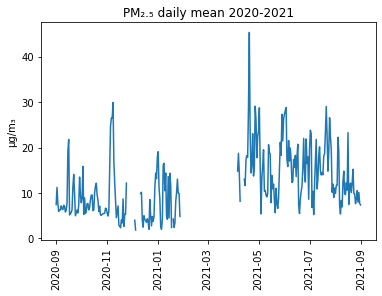

In [20]:
# Show daily mean PM2.5 20/21 on line graph
plt.plot(pm25_20_21_daily_mean)
plt.title("PM\u2082.\u2085 daily mean 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

Timestamp(UTC)
2020-09-30 00:00:00+00:00     8.383219
2020-10-31 00:00:00+00:00     7.640414
2020-11-30 00:00:00+00:00    10.790919
2020-12-31 00:00:00+00:00     6.555143
2021-01-31 00:00:00+00:00     9.389343
2021-02-28 00:00:00+00:00          NaN
2021-03-31 00:00:00+00:00          NaN
2021-04-30 00:00:00+00:00    20.226596
2021-05-31 00:00:00+00:00    14.594706
2021-06-30 00:00:00+00:00    16.498138
2021-07-31 00:00:00+00:00    16.631202
2021-08-31 00:00:00+00:00    11.097102
Freq: M, dtype: float64


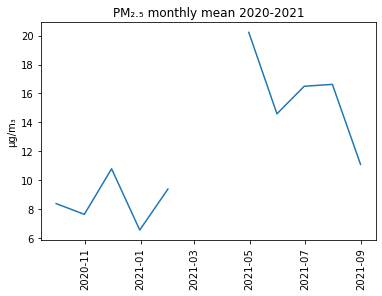

In [21]:
# Resample data to monthly data PM2.5 20/21
pm25_20_21_monthly = pm25_20_21.resample('M')

# Calculate monthly mean 20/21
pm25_20_21_monthly_mean = pm25_20_21_monthly.mean()
print(pm25_20_21_monthly_mean)

# Save to csv files
pm25_20_21_monthly_mean.to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm25_20_21_monthly_mean.csv')

# Show monthly mean PM2.5 20/21 on line graph
plt.plot(pm25_20_21_monthly_mean)
plt.title("PM\u2082.\u2085 monthly mean 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

In [22]:
# Resample data to annual data PM2.5 20/21
# Set year end to August
pm25_20_21_annual = pm25_20_21.resample('A-AUG')

print(pm25_20_21_annual)

DatetimeIndexResampler [freq=<YearEnd: month=8>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [23]:
# Calculate annual mean PM2.5 20/21
pm25_20_21_annual_mean = pm25_20_21_annual.mean()
print(pm25_20_21_annual_mean)

Timestamp(UTC)
2021-08-31 00:00:00+00:00    12.186146
Freq: A-AUG, dtype: float64


<p style="font-size: 20px; color: red">The annual mean for PM2.5 for 2020/2021 = 12.19ug/m3 (less than objective of 20ug/m3)</p>

In [24]:
#########################
# 2020/2021 PM10 Data
#########################

# Create a series of PM10 20/21 data
pm10_20_21 = pd.Series(dfAQ20_21["260-PM10(ug/m3)"].values, index=pd.to_datetime(dfAQ20_21["Timestamp(UTC)"]))
                       
print(pm10_20_21)

Timestamp(UTC)
2020-09-01 00:15:00+00:00    13.00
2020-09-01 00:30:00+00:00    13.46
2020-09-01 00:45:00+00:00    13.80
2020-09-01 01:00:00+00:00    13.90
2020-09-01 01:15:00+00:00    13.67
                             ...  
2021-08-31 22:30:00+00:00     7.10
2021-08-31 22:45:00+00:00     7.30
2021-08-31 23:15:00+00:00     9.62
2021-08-31 23:30:00+00:00     6.74
2021-08-31 23:45:00+00:00     6.66
Length: 29357, dtype: float64


In [25]:
# Resample data to daily data PM10 20/21
pm10_20_21_daily = pm10_20_21.resample('D')

print(pm10_20_21_daily)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, origin=start_day]


In [26]:
# Calculate daily mean PM10 20/21
pm10_20_21_daily_mean = pm10_20_21_daily.mean()
print(pm10_20_21_daily_mean)

Timestamp(UTC)
2020-09-01 00:00:00+00:00    13.922105
2020-09-02 00:00:00+00:00    18.274167
2020-09-03 00:00:00+00:00    14.276042
2020-09-04 00:00:00+00:00    12.349583
2020-09-05 00:00:00+00:00    12.621354
                               ...    
2021-08-27 00:00:00+00:00    12.395833
2021-08-28 00:00:00+00:00    10.195579
2021-08-29 00:00:00+00:00    12.267812
2021-08-30 00:00:00+00:00     9.618021
2021-08-31 00:00:00+00:00     9.596421
Freq: D, Length: 365, dtype: float64


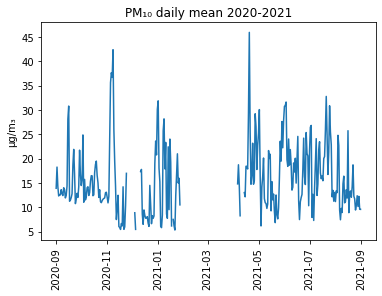

In [27]:
# Show daily mean PM10 20/21 on line graph
plt.plot(pm10_20_21_daily_mean)
plt.title("PM\u2081\u2080 daily mean 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

In [28]:
# Create dataframe of 2020/21 PM10 daily mean results
PM10_20_21dm_df = pd.DataFrame(pm10_20_21_daily_mean)

# Count occurrences where PM10 over 50μg/m3
count = PM10_20_21dm_df[0][PM10_20_21dm_df[0] >50].count()
print(f"Number of occurrences of PM\u2081\u2080 in 2020/2021 over 50μg/m\u2083: {count}")
print(f"% of 2020/2021 readings: {round(100*count/PM10_20_21dm_df[0].count(),2)} ")

Number of occurrences of PM₁₀ in 2020/2021 over 50μg/m₃: 0
% of 2020/2021 readings: 0.0 


Timestamp(UTC)
2020-09-30 00:00:00+00:00    15.120014
2020-10-31 00:00:00+00:00    14.208758
2020-11-30 00:00:00+00:00    17.015960
2020-12-31 00:00:00+00:00    11.964816
2021-01-31 00:00:00+00:00    15.922543
2021-02-28 00:00:00+00:00          NaN
2021-03-31 00:00:00+00:00          NaN
2021-04-30 00:00:00+00:00    20.635108
2021-05-31 00:00:00+00:00    15.664165
2021-06-30 00:00:00+00:00    18.797310
2021-07-31 00:00:00+00:00    18.987314
2021-08-31 00:00:00+00:00    13.018718
Freq: M, dtype: float64


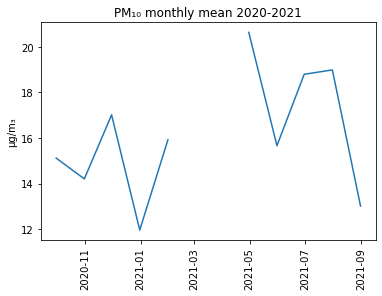

In [29]:
# Resample data to monthly data PM10 20/21
pm10_20_21_monthly = pm10_20_21.resample('M')

# Calculate monthly mean 20/21
pm10_20_21_monthly_mean = pm10_20_21_monthly.mean()
print(pm10_20_21_monthly_mean)

# Save to csv files
pm10_20_21_monthly_mean.to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm10_20_21_monthly_mean.csv')

# Show monthly mean PM10 20/21 on line graph
plt.plot(pm10_20_21_monthly_mean)
plt.title("PM\u2081\u2080 monthly mean 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

In [30]:
# Resample data to annual data PM10 20/21
# Set year end to August
pm10_20_21_annual = pm10_20_21.resample('A-AUG')

print(pm10_20_21_annual)

DatetimeIndexResampler [freq=<YearEnd: month=8>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [31]:
# Calculate annual mean PM10 20/21
pm10_20_21_annual_mean = pm10_20_21_annual.mean()
print(pm10_20_21_annual_mean)

Timestamp(UTC)
2021-08-31 00:00:00+00:00    16.061201
Freq: A-AUG, dtype: float64


<p style="font-size: 20px; color: red">The annual mean for PM10 for 2020/2021 = 16.06ug/m3 (less than objective of 40ug/m3)</p>

## PM1 2020/2021 Data

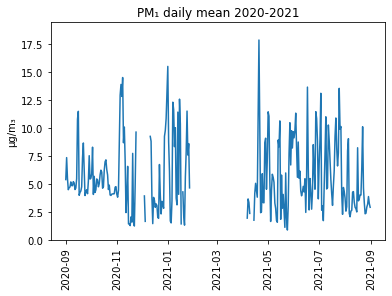

In [32]:
#########################
# 2020/2021 PM1 Data
#########################

# Create a series of PM1 20/21 data
pm1_20_21 = pd.Series(dfAQ20_21["260-PM1(ug/m3)"].values, index=pd.to_datetime(dfAQ20_21["Timestamp(UTC)"]))

# Resample data to daily data PM1 20/21
pm1_20_21_daily = pm1_20_21.resample('D')

# Calculate daily mean PM1 20/21
pm1_20_21_daily_mean = pm1_20_21_daily.mean()

# Resample data to hourly data PM1 20/21
pm1_20_21_hourly = pm1_20_21.resample('H')

# Calculate hourly mean PM1 20/21
pm1_20_21_hourly_mean = pm1_20_21_hourly.mean()

# Show daily mean PM1 20/21 on line graph
plt.plot(pm1_20_21_daily_mean)
plt.title("PM\u2081 daily mean 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

Timestamp(UTC)
2020-09-30 00:00:00+00:00    5.619871
2020-10-31 00:00:00+00:00    5.214613
2020-11-30 00:00:00+00:00    6.369070
2020-12-31 00:00:00+00:00    5.110297
2021-01-31 00:00:00+00:00    7.350983
2021-02-28 00:00:00+00:00         NaN
2021-03-31 00:00:00+00:00         NaN
2021-04-30 00:00:00+00:00    5.835211
2021-05-31 00:00:00+00:00    5.490124
2021-06-30 00:00:00+00:00    6.440177
2021-07-31 00:00:00+00:00    6.777388
2021-08-31 00:00:00+00:00    4.022366
Freq: M, dtype: float64


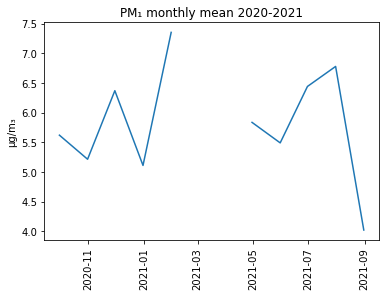

In [33]:
# Resample data to monthly data PM1 20/21
pm1_20_21_monthly = pm1_20_21.resample('M')

# Calculate monthly mean 20/21
pm1_20_21_monthly_mean = pm1_20_21_monthly.mean()
print(pm1_20_21_monthly_mean)

# Show monthly mean PM1 20/21 on line graph
plt.plot(pm1_20_21_monthly_mean)
plt.title("PM\u2081 monthly mean 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

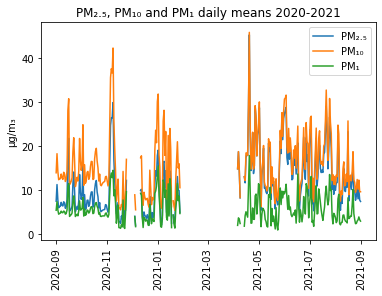

In [34]:
# Plot daily PM2.5, PM10 and PM1 on line graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pm25_20_21_daily_mean, label='PM\u2082.\u2085')
ax.plot(pm10_20_21_daily_mean, label='PM\u2081\u2080')
ax.plot(pm1_20_21_daily_mean, label='PM\u2081')
plt.title("PM\u2082.\u2085, PM\u2081\u2080 and PM\u2081 daily means 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
ax.legend()

## 2020/2021 PM2.5 and PM10 Comparison/Correlation

In [35]:
# 2020/21 PM2.5 and PM10 comparison

# Resample PM2.5 data to hourly and calulate mean
pm25_20_21_hourly = pm25_20_21.resample('H')
pm25_20_21_hourly_mean = pm25_20_21_hourly.mean()
# Resample PM10 data to hourly and calculate mean
pm10_20_21_hourly = pm10_20_21.resample('H')
pm10_20_21_hourly_mean = pm10_20_21_hourly.mean()

print(pm25_20_21_hourly_mean)
print(pm10_20_21_hourly_mean)

Timestamp(UTC)
2020-09-01 00:00:00+00:00    6.976667
2020-09-01 01:00:00+00:00    6.962500
2020-09-01 02:00:00+00:00    6.927500
2020-09-01 03:00:00+00:00    6.890000
2020-09-01 04:00:00+00:00    6.920000
                               ...   
2021-08-31 19:00:00+00:00    8.850000
2021-08-31 20:00:00+00:00    7.705000
2021-08-31 21:00:00+00:00    6.455000
2021-08-31 22:00:00+00:00    5.035000
2021-08-31 23:00:00+00:00    5.153333
Freq: H, Length: 8760, dtype: float64
Timestamp(UTC)
2020-09-01 00:00:00+00:00    13.420000
2020-09-01 01:00:00+00:00    13.477500
2020-09-01 02:00:00+00:00    13.390000
2020-09-01 03:00:00+00:00    13.325000
2020-09-01 04:00:00+00:00    13.390000
                               ...    
2021-08-31 19:00:00+00:00     9.710000
2021-08-31 20:00:00+00:00     8.530000
2021-08-31 21:00:00+00:00     7.695000
2021-08-31 22:00:00+00:00     7.212500
2021-08-31 23:00:00+00:00     7.673333
Freq: H, Length: 8760, dtype: float64


Scatter fitted regression equation: PM₁₀ = 5.14 + 1.19PM₂.₅
Coefficient of Determination -0.6020296380722938


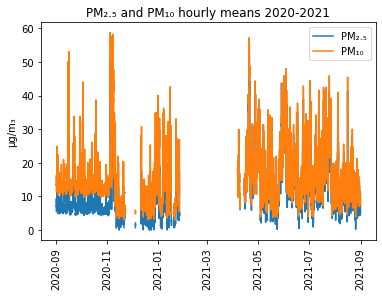

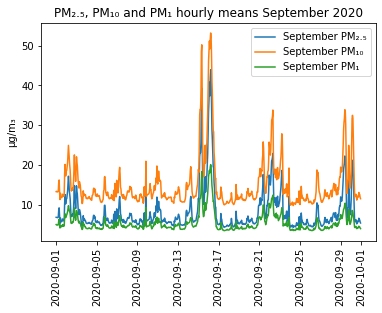

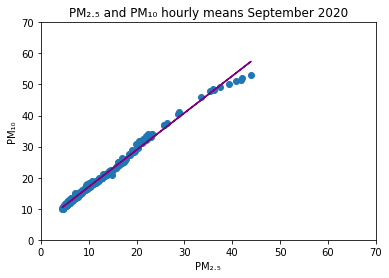

In [114]:
# Plot on line graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pm25_20_21_hourly_mean, label='PM\u2082.\u2085')
ax.plot(pm10_20_21_hourly_mean, label='PM\u2081\u2080')
plt.title("PM\u2082.\u2085 and PM\u2081\u2080 hourly means 2020-2021")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
ax.legend()

# Plot September on line graph as an example of plotting one month
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pm25_20_21_hourly_mean['2020-09'], label='September PM\u2082.\u2085')
ax.plot(pm10_20_21_hourly_mean['2020-09'], label='September PM\u2081\u2080')
ax.plot(pm1_20_21_hourly_mean['2020-09'], label='September PM\u2081')
ax.legend()
plt.xticks(rotation=90)
plt.title("PM\u2082.\u2085, PM\u2081\u2080 and PM\u2081 hourly means September 2020")
plt.ylabel("μg/m\u2083")

# Plot September on scattergraph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pm25_20_21_hourly_mean['2020-09'], pm10_20_21_hourly_mean['2020-09'])
plt.xlabel("PM\u2082.\u2085")
plt.ylabel("PM\u2081\u2080")
plt.xlim(0, 70) 
plt.ylim(0, 70) 
plt.title("PM\u2082.\u2085 and PM\u2081\u2080 hourly means September 2020")

# Find line of best fit
a, b = np.polyfit(pm25_20_21_hourly_mean['2020-09'], pm10_20_21_hourly_mean['2020-09'], 1)

# Add line of best fit to plot
ax.plot(pm25_20_21_hourly_mean['2020-09'], a*pm25_20_21_hourly_mean['2020-09']+b, color='purple')

# Calculate fitted regression equation
print('Scatter fitted regression equation: PM\u2081\u2080 = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'PM\u2082.\u2085')

# Calculate R-squared value
c = pm25_20_21_hourly_mean['2020-09']
d = pm10_20_21_hourly_mean['2020-09']
R_square = r2_score(c, d)
print('Coefficient of Determination', R_square)

In [37]:
print(pm25_20_21_hourly_mean['2020-09'])

Timestamp(UTC)
2020-09-01 00:00:00+00:00    6.976667
2020-09-01 01:00:00+00:00    6.962500
2020-09-01 02:00:00+00:00    6.927500
2020-09-01 03:00:00+00:00    6.890000
2020-09-01 04:00:00+00:00    6.920000
                               ...   
2020-09-30 19:00:00+00:00    6.747500
2020-09-30 20:00:00+00:00    6.380000
2020-09-30 21:00:00+00:00    6.337500
2020-09-30 22:00:00+00:00    5.827500
2020-09-30 23:00:00+00:00    5.552500
Freq: H, Length: 720, dtype: float64


In [38]:
print(pm10_20_21_hourly_mean['2020-09'])

Timestamp(UTC)
2020-09-01 00:00:00+00:00    13.4200
2020-09-01 01:00:00+00:00    13.4775
2020-09-01 02:00:00+00:00    13.3900
2020-09-01 03:00:00+00:00    13.3250
2020-09-01 04:00:00+00:00    13.3900
                              ...   
2020-09-30 19:00:00+00:00    13.1950
2020-09-30 20:00:00+00:00    12.7275
2020-09-30 21:00:00+00:00    12.6950
2020-09-30 22:00:00+00:00    11.9325
2020-09-30 23:00:00+00:00    11.6400
Freq: H, Length: 720, dtype: float64


## 2021/2022 Data

The following sections focus on 2021/2022 data

In [39]:
#########################
# 2021/2022 PM2.5 Data
#########################

# Create a series of PM2.5 21/22 data
pm25_21_22 = pd.Series(dfAQ21_22["260-PM2.5(ug/m3)"].values, index=pd.to_datetime(dfAQ21_22["Timestamp(UTC)"]))
                       
print(pm25_21_22)

Timestamp(UTC)
2021-09-01 00:00:00+00:00    3.87
2021-09-01 00:15:00+00:00    3.63
2021-09-01 00:30:00+00:00    3.70
2021-09-01 00:45:00+00:00    3.96
2021-09-01 01:00:00+00:00    3.59
                             ... 
2022-08-31 21:45:00+00:00    4.29
2022-08-31 22:00:00+00:00    3.91
2022-08-31 22:15:00+00:00    3.58
2022-08-31 22:30:00+00:00    3.80
2022-08-31 22:45:00+00:00    3.09
Length: 34629, dtype: float64


In [40]:
# Resample data to daily data PM2.5 21/22
pm25_21_22_daily = pm25_21_22.resample('D')

print(pm25_21_22_daily)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, origin=start_day]


In [41]:
# Calculate daily mean PM2.5 21/22
pm25_21_22_daily_mean = pm25_21_22_daily.mean()
print(pm25_21_22_daily_mean)

Timestamp(UTC)
2021-09-01 00:00:00+00:00    16.405000
2021-09-02 00:00:00+00:00    14.695521
2021-09-03 00:00:00+00:00    19.408125
2021-09-04 00:00:00+00:00    19.430833
2021-09-05 00:00:00+00:00    20.576875
                               ...    
2022-08-27 00:00:00+00:00     9.391667
2022-08-28 00:00:00+00:00     8.245938
2022-08-29 00:00:00+00:00     7.570625
2022-08-30 00:00:00+00:00     7.456979
2022-08-31 00:00:00+00:00     6.963261
Freq: D, Length: 365, dtype: float64


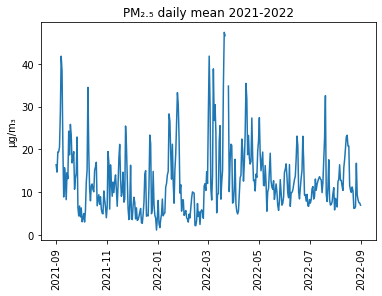

In [42]:
# Show daily mean PM2.5 21/22 on line graph
plt.plot(pm25_21_22_daily_mean)
plt.title("PM\u2082.\u2085 daily mean 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

Timestamp(UTC)
2021-09-30 00:00:00+00:00    17.468161
2021-10-31 00:00:00+00:00     9.823220
2021-11-30 00:00:00+00:00    12.138765
2021-12-31 00:00:00+00:00     7.212801
2022-01-31 00:00:00+00:00    13.350844
2022-02-28 00:00:00+00:00     6.285620
2022-03-31 00:00:00+00:00    21.450877
2022-04-30 00:00:00+00:00    16.035537
2022-05-31 00:00:00+00:00    12.455757
2022-06-30 00:00:00+00:00    12.676433
2022-07-31 00:00:00+00:00    11.656360
2022-08-31 00:00:00+00:00    12.346343
Freq: M, dtype: float64


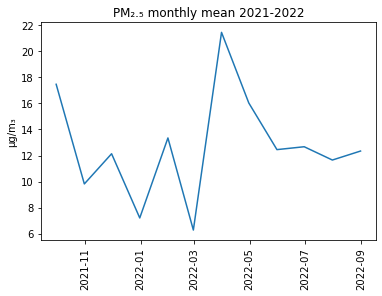

In [43]:
# Resample data to monthly data PM2.5 21/22
pm25_21_22_monthly = pm25_21_22.resample('M')

# Calculate monthly mean 20/21
pm25_21_22_monthly_mean = pm25_21_22_monthly.mean()
print(pm25_21_22_monthly_mean)

# Save to csv files
pm25_21_22_monthly_mean.to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm25_21_22_monthly_mean.csv')

# Show monthly mean PM2.5 21/22 on line graph
plt.plot(pm25_21_22_monthly_mean)
plt.title("PM\u2082.\u2085 monthly mean 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

In [44]:
# Resample data to annual data PM2.5 21/22
# Set year end to August
pm25_21_22_annual = pm25_21_22.resample('A-AUG')

print(pm25_21_22_annual)

DatetimeIndexResampler [freq=<YearEnd: month=8>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [45]:
# Calculate annual mean PM2.5 21/22
pm25_21_22_annual_mean = pm25_21_22_annual.mean()
print(pm25_21_22_annual_mean)

Timestamp(UTC)
2022-08-31 00:00:00+00:00    12.678087
Freq: A-AUG, dtype: float64


<p style="font-size: 20px; color: red">The annual mean for PM2.5 for 2021/2022 = 12.68ug/m3 (less than objective of 20ug/m3).  However this is greater than 2020/2021</p>

In [46]:
#########################
# 2021/2022 PM10 Data
#########################

# Create a series of PM10 20/21 data
pm10_21_22 = pd.Series(dfAQ21_22["260-PM10(ug/m3)"].values, index=pd.to_datetime(dfAQ21_22["Timestamp(UTC)"]))
                       
print(pm10_21_22)

Timestamp(UTC)
2021-09-01 00:00:00+00:00    6.88
2021-09-01 00:15:00+00:00    6.52
2021-09-01 00:30:00+00:00    6.86
2021-09-01 00:45:00+00:00    7.04
2021-09-01 01:00:00+00:00    6.72
                             ... 
2022-08-31 21:45:00+00:00    4.72
2022-08-31 22:00:00+00:00    4.30
2022-08-31 22:15:00+00:00    3.94
2022-08-31 22:30:00+00:00    4.18
2022-08-31 22:45:00+00:00    3.28
Length: 34629, dtype: float64


In [47]:
# Resample data to daily data PM10 21/22
pm10_21_22_daily = pm10_21_22.resample('D')

print(pm10_21_22_daily)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, origin=start_day]


In [48]:
# Calculate daily mean PM10 21/22
pm10_21_22_daily_mean = pm10_21_22_daily.mean()
print(pm10_21_22_daily_mean)

Timestamp(UTC)
2021-09-01 00:00:00+00:00    18.639583
2021-09-02 00:00:00+00:00    16.522604
2021-09-03 00:00:00+00:00    21.570521
2021-09-04 00:00:00+00:00    21.301250
2021-09-05 00:00:00+00:00    23.621771
                               ...    
2022-08-27 00:00:00+00:00    10.378854
2022-08-28 00:00:00+00:00     9.527292
2022-08-29 00:00:00+00:00     8.621250
2022-08-30 00:00:00+00:00     8.581563
2022-08-31 00:00:00+00:00     8.166413
Freq: D, Length: 365, dtype: float64


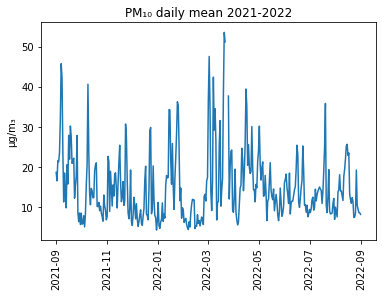

In [49]:
# Show daily mean PM10 21/22 on line graph
plt.plot(pm10_21_22_daily_mean)
plt.title("PM\u2081\u2080 daily mean 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

In [50]:
# Create dataframe of 2021/2022 PM10 daily mean results
PM10_21_22dm_df = pd.DataFrame(pm10_21_22_daily_mean)

# Count occurrences where PM10 over 50μg/m3
count = PM10_21_22dm_df[0][PM10_21_22dm_df[0] >50].count()
print(f"Number of occurrences of PM\u2081\u2080 in 2021/2022 over 50μg/m\u2083: {count}")
print(f"% of 2021/2022 readings: {round(100*count/PM10_21_22dm_df[0].count(),2)} ")

# List date/time when PM10 over 50μg/m3
print(f"Dates when PM\u2081\u2080 exceeded 50μg/m\u2083:\n{PM10_21_22dm_df[0][PM10_21_22dm_df[0] >50]}")

# Print 21 and 22 March 2022 to identify their index numbers
AQ21032022 = dfAQ21_22.loc[dfAQ21_22['Timestamp(UTC)']=='2022-03-21']
AQ22032022 = dfAQ21_22.loc[dfAQ21_22['Timestamp(UTC)']=='2022-03-22']
print(AQ21032022)
print(AQ22032022)

# 21 March starts at 19279 and 22 March ends at 19466
dfAQ21_22March = dfAQ21_22.loc[19279:19466].set_index('Timestamp(UTC)')
print(dfAQ21_22March)
dfAQ21_22March.describe()


Number of occurrences of PM₁₀ in 2021/2022 over 50μg/m₃: 2
% of 2021/2022 readings: 0.55 
Dates when PM₁₀ exceeded 50μg/m₃:
Timestamp(UTC)
2022-03-21 00:00:00+00:00    53.540104
2022-03-22 00:00:00+00:00    51.151957
Freq: D, Name: 0, dtype: float64
                 Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
19279 2022-03-21 00:00:00+00:00      1647820800  2022-03-21T00:00:00+0000   

       260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
19279         4.77              73.58           25.64           1.52   

       260-NO(ug/m3)  260-PM1(ug/m3)  260-PM2.5(ug/m3)  260-PM10(ug/m3)  \
19279           0.01           29.07             46.49            51.09   

       260-Ambient temp(C)  260-Ambient humidity(%RH)  \
19279                 4.75                      80.41   

      260-Ambient pressure(hPa)  
19279                      1024  
                 Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
19375 2022-03-22 00:00:00+00:00      16

,Timestamp(UTS),260-Temp(C),260-Humidity(%RH),260-NO2(ug/m3),260-O3(ug/m3),260-NO(ug/m3),260-PM1(ug/m3),260-PM2.5(ug/m3),260-PM10(ug/m3),260-Ambient temp(C),260-Ambient humidity(%RH)
count,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,1.647905e+09,13.047287,53.019947,29.559362,17.581968,3.750904,19.826755,46.998936,52.371436,12.867713,57.178777
std,4.897356e+04,7.278721,17.478515,16.856603,22.893541,10.284839,6.061300,7.771842,8.269214,7.137120,18.906210
min,1.647821e+09,1.210000,25.190000,0.760000,0.000000,0.000000,7.130000,29.620000,32.580000,1.260000,25.470000
25%,1.647863e+09,6.427500,36.075000,17.882500,0.000000,0.175000,14.490000,42.202500,48.257500,6.330000,38.890000
50%,1.647905e+09,13.020000,50.205000,28.285000,2.765000,0.985000,19.910000,45.790000,51.025000,12.780000,54.790000
75%,1.647947e+09,19.205000,70.782500,38.455000,35.130000,2.027500,25.260000,48.497500,54.375000,18.915000,75.950000
max,1.647989e+09,24.260000,82.350000,83.180000,71.720000,72.540000,30.890000,72.130000,79.350000,23.810000,87.750000


<p style="font-size: 20px; color: red">There were 2 occurrences of PM10 in 2021/2022 over 50ug/m3 on 21 and 22 March 2022</p>

## Investigation of PM10 exceedances

Humidity has been known to affect PM10 readings.  Therefore analysis of PM10 and ambient humidity was undertaken to identify if this was the cause on 21 and 22 March 2022.

Text(0.5, 1.0, 'PM₂.₅, PM₁₀ and Ambient Humidity on 21 and 22 March 2022')

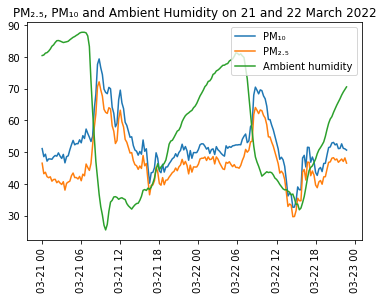

In [51]:
# Plot 21st and 22nd March 2022 PM2.5 and PM10 and Ambient Humidity data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(dfAQ21_22March['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.plot(dfAQ21_22March['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(dfAQ21_22March['260-Ambient humidity(%RH)'], label='Ambient humidity')
plt.xticks(rotation=90)
ax.legend()
plt.title("PM\u2082.\u2085, PM\u2081\u2080 and Ambient Humidity on 21 and 22 March 2022")

In [52]:
# Focus on March 2022
# Print 21 and 22 March 2022 to identify their index numbers
AQ01032022 = dfAQ21_22.loc[dfAQ21_22['Timestamp(UTC)']=='2022-03-01']
AQ01042022 = dfAQ21_22.loc[dfAQ21_22['Timestamp(UTC)']=='2022-04-01']
print(AQ01032022)
print(AQ01042022)

# 1 March starts at 17360 and 1 April starts at 19949
dfAQMarch2022 = dfAQ21_22.loc[17360:19948].set_index('Timestamp(UTC)')
print(dfAQMarch2022)
dfAQMarch2022.describe()


                 Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
17360 2022-03-01 00:00:00+00:00      1646092800  2022-03-01T00:00:00+0000   

       260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
17360         8.57              86.73           18.48          22.46   

       260-NO(ug/m3)  260-PM1(ug/m3)  260-PM2.5(ug/m3)  260-PM10(ug/m3)  \
17360           0.46           20.09             23.36            31.83   

       260-Ambient temp(C)  260-Ambient humidity(%RH)  \
17360                  8.6                      90.47   

      260-Ambient pressure(hPa)  
17360                    1021.5  
                 Timestamp(UTC)  Timestamp(UTS)          Timestamp(Local)  \
19949 2022-04-01 00:00:00+00:00      1648771200  2022-04-01T01:00:00+0100   

       260-Temp(C)  260-Humidity(%RH)  260-NO2(ug/m3)  260-O3(ug/m3)  \
19949         2.49              54.07           13.62          33.85   

       260-NO(ug/m3)  260-PM1(ug/m3)  260-PM2.5(ug/m3)  260-PM10(u

,Timestamp(UTS),260-Temp(C),260-Humidity(%RH),260-NO2(ug/m3),260-O3(ug/m3),260-NO(ug/m3),260-PM1(ug/m3),260-PM2.5(ug/m3),260-PM10(ug/m3),260-Ambient temp(C),260-Ambient humidity(%RH)
count,2.589000e+03,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000
mean,1.647322e+09,10.098710,68.118718,24.589540,23.154867,2.882124,11.271846,21.450877,24.722862,9.937926,72.381808
std,7.705309e+05,4.586545,15.473963,14.219468,19.230451,5.694145,8.436258,15.163255,16.439573,4.449405,16.176271
min,1.646093e+09,0.800000,25.110000,0.000000,0.000000,0.000000,0.000000,0.000000,2.830000,0.800000,25.470000
25%,1.646675e+09,7.080000,56.280000,13.850000,2.440000,0.490000,3.470000,9.020000,10.440000,7.100000,60.830000
50%,1.647257e+09,8.950000,73.240000,21.350000,22.320000,1.440000,9.830000,18.600000,20.660000,8.830000,78.290000
75%,1.647841e+09,12.470000,80.310000,32.830000,39.310000,2.560000,18.380000,31.270000,37.340000,12.140000,85.080000
max,1.648770e+09,24.260000,90.710000,83.180000,71.850000,83.780000,32.780000,72.130000,79.350000,23.810000,93.950000


Text(0.5, 1.0, 'PM₂.₅, PM₁₀ and Ambient Humidity during March 2022')

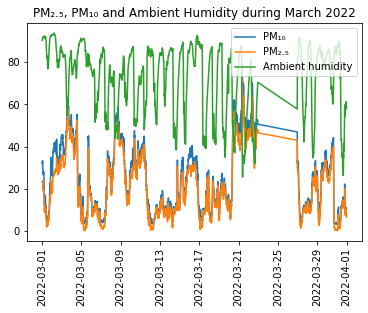

In [53]:
# Plot March 2022 PM2.5 and PM10 and Ambient Humidity data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(dfAQMarch2022['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.plot(dfAQMarch2022['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(dfAQMarch2022['260-Ambient humidity(%RH)'], label='Ambient humidity')
plt.xticks(rotation=90)
ax.legend()
plt.title("PM\u2082.\u2085, PM\u2081\u2080 and Ambient Humidity during March 2022")

<b>Based on the visualisations above, humidity did not appear to be the cause of the PM10 exceedances</b>

Timestamp(UTC)
2021-09-30 00:00:00+00:00    20.345834
2021-10-31 00:00:00+00:00    12.653822
2021-11-30 00:00:00+00:00    15.337470
2021-12-31 00:00:00+00:00    10.580824
2022-01-31 00:00:00+00:00    16.395133
2022-02-28 00:00:00+00:00     7.929148
2022-03-31 00:00:00+00:00    24.722862
2022-04-30 00:00:00+00:00    17.768854
2022-05-31 00:00:00+00:00    13.877344
2022-06-30 00:00:00+00:00    14.193446
2022-07-31 00:00:00+00:00    12.940360
2022-08-31 00:00:00+00:00    13.841060
Freq: M, dtype: float64


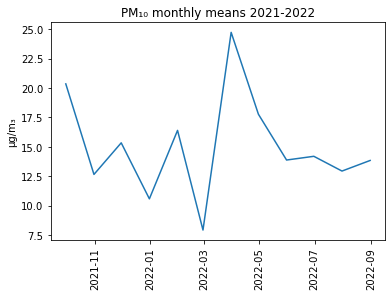

In [54]:
# Resample data to monthly data PM10 21/22
pm10_21_22_monthly = pm10_21_22.resample('M')

# Calculate monthly mean 20/21
pm10_21_22_monthly_mean = pm10_21_22_monthly.mean()
print(pm10_21_22_monthly_mean)

# Save to csv files
pm10_21_22_monthly_mean.to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm10_21_22_monthly_mean.csv')

# Show monthly mean PM10 21/22 on line graph
plt.plot(pm10_21_22_monthly_mean)
plt.title("PM\u2081\u2080 monthly means 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

In [55]:
# Resample data to annual data PM10 21/22
# Set year end to August
pm10_21_22_annual = pm10_21_22.resample('A-AUG')

print(pm10_21_22_annual)

DatetimeIndexResampler [freq=<YearEnd: month=8>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [56]:
# Calculate annual mean PM10 21/22
pm10_21_22_annual_mean = pm10_21_22_annual.mean()
print(pm10_21_22_annual_mean)

Timestamp(UTC)
2022-08-31 00:00:00+00:00    14.97954
Freq: A-AUG, dtype: float64


<p style="font-size: 20px; color: red">The annual mean for PM10 for 2021/2022 = 14.98ug/m3 (less than objective of 40ug/m3)</p>

## PM1 2021/2022 data

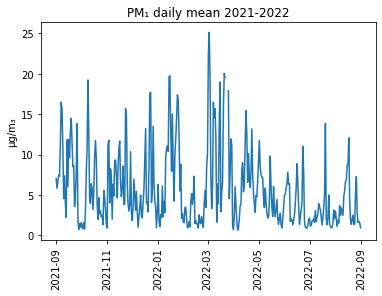

In [57]:
#########################
# 2021/2022 PM1 Data
#########################

# Create a series of PM1 21/22 data
pm1_21_22 = pd.Series(dfAQ21_22["260-PM1(ug/m3)"].values, index=pd.to_datetime(dfAQ21_22["Timestamp(UTC)"]))

# Resample data to daily data PM1 21/22
pm1_21_22_daily = pm1_21_22.resample('D')

# Calculate daily mean PM1 21/22
pm1_21_22_daily_mean = pm1_21_22_daily.mean()

# Resample data to hourly data PM1 20/21
pm1_21_22_hourly = pm1_21_22.resample('H')

# Calculate hourly mean PM1 20/21
pm1_21_22_hourly_mean = pm1_21_22_hourly.mean()

# Show daily mean PM1 21/22 on line graph
plt.plot(pm1_21_22_daily_mean)
plt.title("PM\u2081 daily mean 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

Timestamp(UTC)
2021-09-30 00:00:00+00:00     7.913863
2021-10-31 00:00:00+00:00     5.077803
2021-11-30 00:00:00+00:00     7.097651
2021-12-31 00:00:00+00:00     5.619203
2022-01-31 00:00:00+00:00     8.489109
2022-02-28 00:00:00+00:00     2.842784
2022-03-31 00:00:00+00:00    11.271846
2022-04-30 00:00:00+00:00     6.024422
2022-05-31 00:00:00+00:00     4.437831
2022-06-30 00:00:00+00:00     4.022998
2022-07-31 00:00:00+00:00     2.650850
2022-08-31 00:00:00+00:00     3.676447
Freq: M, dtype: float64


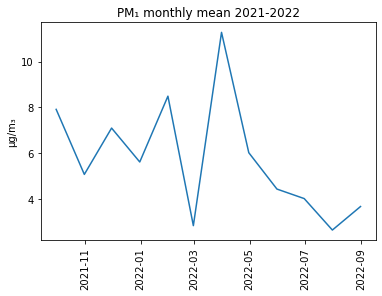

In [58]:
# Resample data to monthly data PM1 21/22
pm1_21_22_monthly = pm1_21_22.resample('M')

# Calculate monthly mean 20/21
pm1_21_22_monthly_mean = pm1_21_22_monthly.mean()
print(pm1_21_22_monthly_mean)

# Show monthly mean PM1 21/22 on line graph
plt.plot(pm1_21_22_monthly_mean)
plt.title("PM\u2081 monthly mean 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
plt.show()

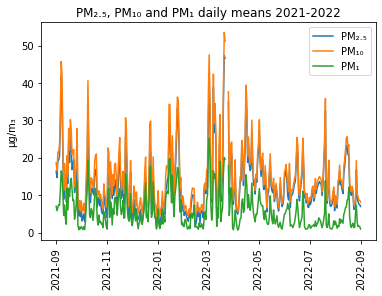

In [59]:
# Plot daily PM2.5, PM10 and PM1 on line graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pm25_21_22_daily_mean, label='PM\u2082.\u2085')
ax.plot(pm10_21_22_daily_mean, label='PM\u2081\u2080')
ax.plot(pm1_21_22_daily_mean, label='PM\u2081')
plt.title("PM\u2082.\u2085, PM\u2081\u2080 and PM\u2081 daily means 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)
ax.legend()

## 2021/2022 PM2.5 PM10 and PM1 Comparison/Correlation

In [60]:
# 2021/22 PM2.5 PM10 and PM1 comparison

# Resample PM2.5 data to hourly and calulate mean
pm25_21_22_hourly = pm25_21_22.resample('H')
pm25_21_22_hourly_mean = pm25_21_22_hourly.mean()
# Resample PM10 data to hourly
pm10_21_22_hourly = pm10_21_22.resample('H')
pm10_21_22_hourly_mean = pm10_21_22_hourly.mean()
# NB PM1 data already resampled to hourly above

print(pm25_21_22_hourly_mean)
print(pm10_21_22_hourly_mean)

Timestamp(UTC)
2021-09-01 00:00:00+00:00    3.7900
2021-09-01 01:00:00+00:00    3.9525
2021-09-01 02:00:00+00:00    5.8575
2021-09-01 03:00:00+00:00    7.8800
2021-09-01 04:00:00+00:00    9.5150
                              ...  
2022-08-31 18:00:00+00:00    8.1325
2022-08-31 19:00:00+00:00    6.6275
2022-08-31 20:00:00+00:00    5.1975
2022-08-31 21:00:00+00:00    4.6600
2022-08-31 22:00:00+00:00    3.5950
Freq: H, Length: 8759, dtype: float64
Timestamp(UTC)
2021-09-01 00:00:00+00:00     6.8250
2021-09-01 01:00:00+00:00     7.1725
2021-09-01 02:00:00+00:00     9.2200
2021-09-01 03:00:00+00:00    10.6525
2021-09-01 04:00:00+00:00    11.7025
                              ...   
2022-08-31 18:00:00+00:00     8.9475
2022-08-31 19:00:00+00:00     7.2900
2022-08-31 20:00:00+00:00     5.7175
2022-08-31 21:00:00+00:00     5.1275
2022-08-31 22:00:00+00:00     3.9250
Freq: H, Length: 8759, dtype: float64


Scatter fitted regression equation: PM₁₀ = 1.90 + 1.06PM₂.₅
Coefficient of Determination 0.8929959744597823


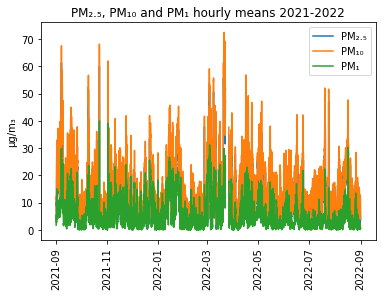

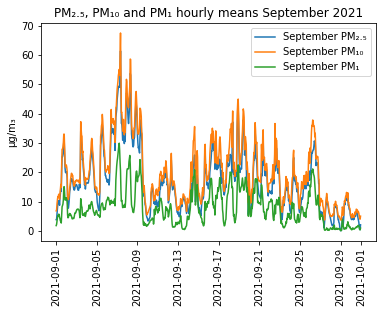

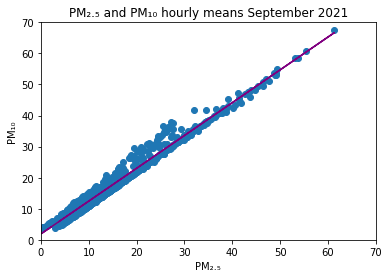

In [115]:
# Plot on line graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pm25_21_22_hourly_mean, label='PM\u2082.\u2085')
ax.plot(pm10_21_22_hourly_mean, label='PM\u2081\u2080')
ax.plot(pm1_21_22_hourly_mean, label='PM\u2081')
ax.legend()
plt.title("PM\u2082.\u2085, PM\u2081\u2080 and PM\u2081 hourly means 2021-2022")
plt.ylabel("μg/m\u2083")
plt.xticks(rotation=90)

# Plot September on line graph as an example of plotting one month
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(pm25_21_22_hourly_mean['2021-09'], label='September PM\u2082.\u2085')
ax.plot(pm10_21_22_hourly_mean['2021-09'], label='September PM\u2081\u2080')
ax.plot(pm1_21_22_hourly_mean['2021-09'], label='September PM\u2081')
ax.legend()
plt.xticks(rotation=90)
plt.title("PM\u2082.\u2085, PM\u2081\u2080 and PM\u2081 hourly means September 2021")
plt.ylabel("μg/m\u2083")

# Plot September on scattergraph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pm25_21_22_hourly_mean['2021-09'], pm10_21_22_hourly_mean['2021-09'])
plt.xlabel("PM\u2082.\u2085")
plt.ylabel("PM\u2081\u2080")
plt.xlim(0, 70) 
plt.ylim(0, 70) 
plt.title("PM\u2082.\u2085 and PM\u2081\u2080 hourly means September 2021")

# Find line of best fit
a, b = np.polyfit(pm25_21_22_hourly_mean['2021-09'], pm10_21_22_hourly_mean['2021-09'], 1)

# Add line of best fit to plot
ax.plot(pm25_21_22_hourly_mean['2021-09'], a*pm25_21_22_hourly_mean['2021-09']+b, color='purple')

# Calculate fitted regression equation
print('Scatter fitted regression equation: PM\u2081\u2080 = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'PM\u2082.\u2085')

# Calculate R-squared value
a = pm25_21_22_hourly_mean['2021-09']
b = pm10_21_22_hourly_mean['2021-09']
R_square = r2_score(a, b)
print('Coefficient of Determination', R_square)

In [62]:
print(pm25_21_22_hourly_mean['2021-09'])

Timestamp(UTC)
2021-09-01 00:00:00+00:00    3.7900
2021-09-01 01:00:00+00:00    3.9525
2021-09-01 02:00:00+00:00    5.8575
2021-09-01 03:00:00+00:00    7.8800
2021-09-01 04:00:00+00:00    9.5150
                              ...  
2021-09-30 19:00:00+00:00    2.8925
2021-09-30 20:00:00+00:00    1.4350
2021-09-30 21:00:00+00:00    0.5225
2021-09-30 22:00:00+00:00    0.4125
2021-09-30 23:00:00+00:00    2.0800
Freq: H, Length: 720, dtype: float64


Text(0.5, 1.0, 'PM₂.₅ daily average 2020-2022')

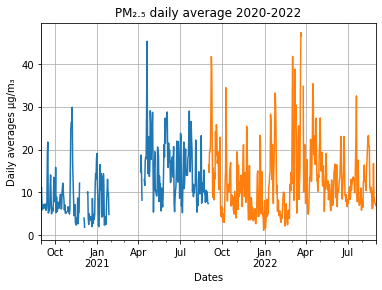

In [63]:
# Plot both years PM2.5
fig, ax = plt.subplots()
pm25_20_21_daily_mean.plot(ax=ax)
pm25_21_22_daily_mean.plot(ax=ax)
ax.grid()
ax.set_xlabel('Dates')
ax.set_ylabel('Daily averages μg/m\u2083')
ax.set_title("PM\u2082.\u2085 daily average 2020-2022")


In [64]:
print(pm10_21_22_hourly_mean['2021-09'])

Timestamp(UTC)
2021-09-01 00:00:00+00:00     6.825000
2021-09-01 01:00:00+00:00     7.172500
2021-09-01 02:00:00+00:00     9.220000
2021-09-01 03:00:00+00:00    10.652500
2021-09-01 04:00:00+00:00    11.702500
                               ...    
2021-09-30 19:00:00+00:00     6.022500
2021-09-30 20:00:00+00:00     4.975000
2021-09-30 21:00:00+00:00     4.047500
2021-09-30 22:00:00+00:00     3.985000
2021-09-30 23:00:00+00:00     5.023333
Freq: H, Length: 720, dtype: float64


Text(0.5, 1.0, 'PM₁₀ daily average 2020-2022')

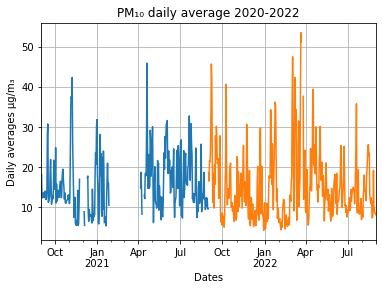

In [65]:
# Plot both years PM10
fig, ax = plt.subplots()
pm10_20_21_daily_mean.plot(ax=ax)
pm10_21_22_daily_mean.plot(ax=ax)
ax.grid()
ax.set_xlabel('Dates')
ax.set_ylabel('Daily averages μg/m\u2083')
ax.set_title("PM\u2081\u2080 daily average 2020-2022")

## NO2 Data

NO2 is included in the national air quality objectives published by DEFRA:
- Nitrogen dioxide - 200ug/m3 not to be exceeded more than 18 times a year (1 hour mean); 40ug/m3 annual mean.

Traditionally there is a belief that traffic volume causes high NO2, therefore this was to be explored during this analysis.

West Suffolk District Council also provided monthly NO2 data from a diffusion tube situated in Tayfen Road.  This data could be compared to the Zephyr sensor as a comparison when resampling the Zephyr 15 minute data to monthly mean data.

In [66]:
#########################
# NO2 Data
#########################

# Create a series of NO2 20/21 data
no2_20_21 = pd.Series(dfAQ20_21["260-NO2(ug/m3)"].values, index=pd.to_datetime(dfAQ20_21["Timestamp(UTC)"]))

# Create a series of NO2 21/22 data
no2_21_22 = pd.Series(dfAQ21_22["260-NO2(ug/m3)"].values, index=pd.to_datetime(dfAQ21_22["Timestamp(UTC)"]))

# Resample data to monthly data 20/21
no2_20_21_monthly = no2_20_21.resample('M')

# Resample data to monthly data 21/22
no2_21_22_monthly = no2_21_22.resample('M')

# Calculate monthly mean 20/21
no2_20_21_monthly_mean = no2_20_21_monthly.mean()
print(no2_20_21_monthly_mean)

# Calculate monthly mean 21/22
no2_21_22_monthly_mean = no2_21_22_monthly.mean()
print(no2_21_22_monthly_mean)

# Save to csv files
no2_20_21_monthly_mean.to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/no2_20_21_monthly_mean.csv')
no2_21_22_monthly_mean.to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/no2_21_22_monthly_mean.csv')

Timestamp(UTC)
2020-09-30 00:00:00+00:00    44.229767
2020-10-31 00:00:00+00:00    35.935915
2020-11-30 00:00:00+00:00    36.184597
2020-12-31 00:00:00+00:00    32.213475
2021-01-31 00:00:00+00:00    40.877967
2021-02-28 00:00:00+00:00          NaN
2021-03-31 00:00:00+00:00          NaN
2021-04-30 00:00:00+00:00    19.828517
2021-05-31 00:00:00+00:00    16.397284
2021-06-30 00:00:00+00:00    12.794325
2021-07-31 00:00:00+00:00    11.171138
2021-08-31 00:00:00+00:00    14.550828
Freq: M, dtype: float64
Timestamp(UTC)
2021-09-30 00:00:00+00:00    18.094732
2021-10-31 00:00:00+00:00    19.349812
2021-11-30 00:00:00+00:00    30.933354
2021-12-31 00:00:00+00:00    24.691748
2022-01-31 00:00:00+00:00    31.390477
2022-02-28 00:00:00+00:00    22.364663
2022-03-31 00:00:00+00:00    24.589540
2022-04-30 00:00:00+00:00    20.895373
2022-05-31 00:00:00+00:00    18.605232
2022-06-30 00:00:00+00:00    15.506832
2022-07-31 00:00:00+00:00    15.401176
2022-08-31 00:00:00+00:00    15.870670
Freq: M, d

The diffusion tube data was provided as an excel spreadsheet covering monthly raw and bias adjusted readings for January 2020 to December 2022.

The bias adjusted readings for September 2020 to August 2022 (June 2021 was missing) were combined with the Zephyr monthly mean figures obtained above into 2 csv files (2020/2021 and 2021/2022) and used below.

In [67]:
# Read in combined sensor and diff tube data
# 2020/21
df_no2_20_21 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_20_21_monthly_means_comb.csv')
# Set index to be Timestamp column
df_no2_20_21.set_index('Timestamp(UTC)')
# Cast to datetime
df_no2_20_21['Timestamp(UTC)'] = pd.DatetimeIndex(df_no2_20_21['Timestamp(UTC)'])
# Check datatypes for the datetime col
print(df_no2_20_21.dtypes)
print(df_no2_20_21)

# 2021/22
df_no2_21_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_21_22_monthly_means_comb.csv')
# Set index to be Timestamp column
df_no2_21_22.set_index('Timestamp(UTC)')
# Cast to datetime
df_no2_21_22['Timestamp(UTC)'] = pd.DatetimeIndex(df_no2_21_22['Timestamp(UTC)'])
# Check datatypes for the datetime col
print(df_no2_21_22.dtypes)
print(df_no2_21_22)


Timestamp(UTC)       datetime64[ns, UTC]
Sensor                           float64
TayfenDT adjusted                float64
dtype: object
              Timestamp(UTC)  Sensor  TayfenDT adjusted
0  2020-09-30 00:00:00+00:00    44.2               29.6
1  2020-10-31 00:00:00+00:00    35.9               25.5
2  2020-11-30 00:00:00+00:00    36.2               26.3
3  2020-12-31 00:00:00+00:00    32.2               24.7
4  2021-01-31 00:00:00+00:00    40.9               26.7
5  2021-02-28 00:00:00+00:00     NaN               24.5
6  2021-03-31 00:00:00+00:00     NaN               27.5
7  2021-04-30 00:00:00+00:00    19.8               28.8
8  2021-05-31 00:00:00+00:00    16.4               24.4
9  2021-06-30 00:00:00+00:00    12.8                NaN
10 2021-07-31 00:00:00+00:00    11.2               20.1
11 2021-08-31 00:00:00+00:00    14.6               22.8
Timestamp(UTC)       datetime64[ns, UTC]
Sensor                           float64
TayfenDT adjusted                float64
dtype: objec

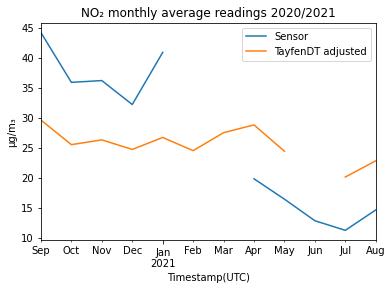

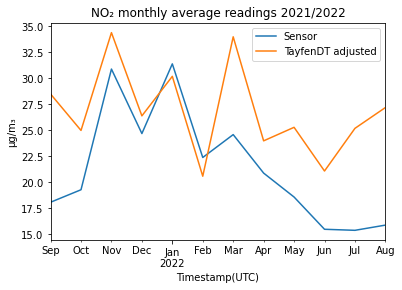

In [68]:
# Plot both readings NO2 2020/2021
df_no2_20_21.plot(x="Timestamp(UTC)", y=['Sensor','TayfenDT adjusted'], kind='line')
plt.title("NO\u2082 monthly average readings 2020/2021")
plt.ylabel("μg/m\u2083")
plt.show()

# Plot both readings NO2 2021/2022
df_no2_21_22.plot(x="Timestamp(UTC)", y=['Sensor','TayfenDT adjusted'], kind='line')
plt.title("NO\u2082 monthly average readings 2021/2022")
plt.ylabel("μg/m\u2083")
plt.show()

Text(0.5, 1.0, 'Lockdowns and Tayfen Diff Tube NO₂ data')

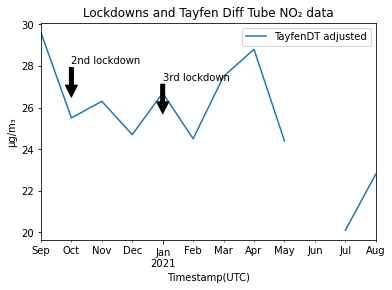

In [69]:
# Plot lockdowns on Tayfen NO2 data

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_20_21_monthly_means_comb.csv', index_col=0, parse_dates=True)
no2 = data['TayfenDT adjusted']

no2.plot(ax=ax)

ldowns = [
    (datetime(2020, 10, 31, tzinfo=timezone(offset=timedelta())), '2nd lockdown'),
    (datetime(2021, 1, 6, tzinfo=timezone(offset=timedelta())), '3rd lockdown')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, no2.asof(date) + 1),
    xytext=(date, no2.asof(date) + 3),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='top')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('Lockdowns and Tayfen Diff Tube NO\u2082 data')

## DEFRA national monitoring sites

The project wished to compare findings from the Bury St Edmunds sensors with other local sensors.

DEFRA have national monitoring sites in the UK.  The nearest live sensors to Bury St Edmunds are Norwich Lakenfields, Wicken Fen and St Osyth, all recording hourly readings.  

When examining pollutants measured throughout September 2020 to August 2022, all have NO2 data; Lakenfields also has PM10 and PM2.5; St Osyth commenced PM10 and PM2.5 recordings from 30 March 2022.

3 csv files for each site were downloaded (All Hourly Pollutant Data for site(Column Format) 2020, 2021 and 2022).

For each file:-
- Header rows were removed
- Unwanted columns removed, retaining Date, Time, Nitric oxide, Nitrogen dioxide, Ozone, PM10, PM2.5
- Replaced 24:00 with 23:59
- Removed dates outside 1/9/20 - 31/8/2022

These 6 updated csv files were used in the analysis below.

In [70]:
#########################
# DEFRA UK AIR DATA
#########################

# Read in DEFRA data, parse dates and create new DateTime column, format to day, month, year

df_WF_20 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/WFEN_2020.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_WF_21 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/WFEN_2021.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_WF_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/WFEN_2022.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_L_20 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/LAK_2020.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_L_21 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/LAK_2021.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_L_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/LAK_2022.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_SO_20 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/OSY_2020.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_SO_21 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/OSY_2021.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)
df_SO_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/DEFRA/OSY_2022.csv', parse_dates={'DateTime':['Date', 'time']}, dayfirst=True)

# Concat into one dataframe for each location
df_WF = pd.concat([df_WF_20, df_WF_21, df_WF_22])
df_L = pd.concat([df_L_20, df_L_21, df_L_22])
df_SO = pd.concat([df_SO_20, df_SO_21, df_SO_22])

# Make DateTime columns date/time aware
df_WF['DateTime'] = pd.to_datetime(df_L['DateTime'], utc=True)
df_L['DateTime'] = pd.to_datetime(df_L['DateTime'], utc=True)
df_SO['DateTime'] = pd.to_datetime(df_L['DateTime'], utc=True)

# Set the DateTime column as index
df_WF.set_index('DateTime', inplace=True)
df_L.set_index('DateTime', inplace=True)
df_SO.set_index('DateTime', inplace=True)

# Check Lakenfields
df_L

,PM10 particulate matter,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Ozone,PM2.5 particulate matter,PM2.5 particulate matter
DateTime,,,,,,,
2020-09-01 01:00:00+00:00,12.775,3.20650,25.84477,30.76133,5.92058,9.953,NaN
2020-09-01 02:00:00+00:00,14.900,16.74041,22.64361,48.31188,1.59656,11.415,NaN
2020-09-01 03:00:00+00:00,19.825,14.96018,17.79461,40.73323,1.64645,15.802,NaN
2020-09-01 04:00:00+00:00,15.100,5.46562,15.88712,24.26762,2.59441,11.958,NaN
2020-09-01 05:00:00+00:00,11.525,0.78080,14.16749,15.36471,12.82237,8.491,NaN
...,...,...,...,...,...,...,...
2022-08-31 20:00:00+00:00,8.075,0.31367,3.65668,4.13763,63.66283,NaN,3.396
2022-08-31 21:00:00+00:00,7.550,0.59249,5.70100,6.60947,60.56950,NaN,3.349
2022-08-31 22:00:00+00:00,8.625,0.55763,7.47398,8.32900,56.72777,NaN,3.561


In [71]:
# Resample for Daily data
df_WF_daily = df_WF.resample('D')
df_L_daily = df_L.resample('D')
df_SO_daily = df_SO.resample('D')

# Calculate daily means
df_WF_daily_mean = df_WF_daily.mean()
df_L_daily_mean = df_L_daily.mean()
df_SO_daily_mean = df_SO_daily.mean()

# Check Wicken Fen
df_WF_daily_mean


,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Ozone,PM10 particulate matter,PM2.5 particulate matter
DateTime,,,,,,
2020-09-01 00:00:00+00:00,0.837312,3.785816,5.069677,49.424067,NaN,NaN
2020-09-02 00:00:00+00:00,0.958217,6.333793,7.803037,55.618359,NaN,NaN
2020-09-03 00:00:00+00:00,0.572764,3.702703,4.580932,42.601267,NaN,NaN
2020-09-04 00:00:00+00:00,0.557799,3.615764,4.471044,45.053620,NaN,NaN
2020-09-05 00:00:00+00:00,0.554415,2.942510,3.792599,43.342725,NaN,NaN
...,...,...,...,...,...,...
2022-08-27 00:00:00+00:00,1.331465,6.547908,8.589456,50.748989,9.744792,4.258042
2022-08-28 00:00:00+00:00,2.959398,5.691270,10.228953,46.585737,6.990625,2.885208
2022-08-29 00:00:00+00:00,0.551692,3.508241,4.354156,55.393150,9.538542,3.538708


In [72]:

# Resample for Monthly data
df_WF_monthly = df_WF.resample('M')
df_L_monthly = df_L.resample('M')
df_SO_monthly = df_SO.resample('M')

# Calculate monthly means
df_WF_monthly_mean = df_WF_monthly.mean()
df_L_monthly_mean = df_L_monthly.mean()
df_SO_monthly_mean = df_SO_monthly.mean()

# Check Wicken Fen
df_WF_monthly_mean

,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Ozone,PM10 particulate matter,PM2.5 particulate matter
DateTime,,,,,,
2020-09-30 00:00:00+00:00,0.758433,4.786564,5.949477,52.029819,NaN,NaN
2020-10-31 00:00:00+00:00,0.627843,5.235999,6.198678,47.383873,NaN,NaN
2020-11-30 00:00:00+00:00,2.209562,11.135212,14.523160,38.837084,NaN,NaN
2020-12-31 00:00:00+00:00,1.294882,10.388830,12.374288,40.795532,NaN,NaN
2021-01-31 00:00:00+00:00,0.866126,8.877979,10.206020,43.256055,NaN,NaN
2021-02-28 00:00:00+00:00,0.903711,7.359612,8.745282,54.563592,NaN,NaN
2021-03-31 00:00:00+00:00,0.742566,7.347450,8.486034,58.043398,NaN,NaN
2021-04-30 00:00:00+00:00,0.804176,5.035627,6.268679,65.845014,NaN,NaN
2021-05-31 00:00:00+00:00,0.792084,4.995581,6.210092,65.405291,NaN,NaN


Text(0.5, 1.0, 'PM₂.₅ monthly averages 2020-2022')

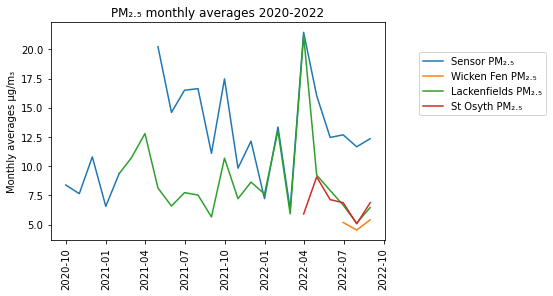

In [73]:
# Plot Sensor and DEFRA PM2.5

# Combine sensor data
pm25Sensor = pd.concat([pm25_20_21_monthly_mean, pm25_21_22_monthly_mean])

# Plot all on line graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(pm25Sensor, label='Sensor PM\u2082.\u2085')
ax.plot(df_WF_monthly_mean['PM2.5 particulate matter'], label='Wicken Fen PM\u2082.\u2085')
ax.plot(df_L_monthly_mean['PM2.5 particulate matter'], label='Lackenfields PM\u2082.\u2085')
ax.plot(df_SO_monthly_mean['PM2.5 particulate matter'], label='St Osyth PM\u2082.\u2085')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=3) # place legend outside plot
ax.set_ylabel('Monthly averages μg/m\u2083')
ax.set_title("PM\u2082.\u2085 monthly averages 2020-2022")


Text(0.5, 1.0, 'PM₁₀ monthly averages 2020-2022')

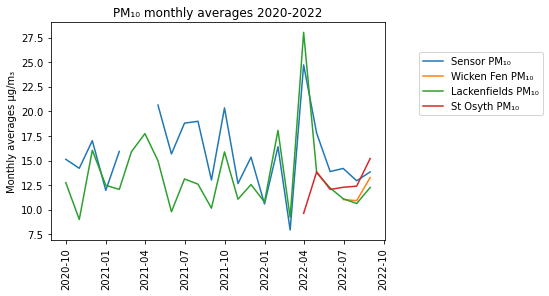

In [74]:
# Plot Sensor and DEFRA PM10

# Combine sensor data
pm10Sensor = pd.concat([pm10_20_21_monthly_mean, pm10_21_22_monthly_mean])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(pm10Sensor, label='Sensor PM\u2081\u2080')
ax.plot(df_WF_monthly_mean['PM10 particulate matter'], label='Wicken Fen PM\u2081\u2080')
ax.plot(df_L_monthly_mean['PM10 particulate matter'], label='Lackenfields PM\u2081\u2080')
ax.plot(df_SO_monthly_mean['PM10 particulate matter'], label='St Osyth PM\u2081\u2080')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=3) # place legend outside plot
ax.set_ylabel('Monthly averages μg/m\u2083')
ax.set_title("PM\u2081\u2080 monthly averages 2020-2022")


Text(0.5, 1.0, 'NO₂ monthly averages 2020-2022')

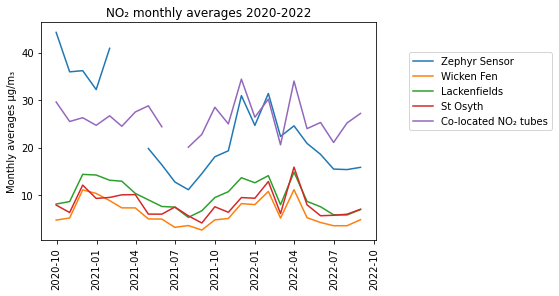

In [75]:
# Plot Sensor, Diffusion Tube and DEFRA NO2 data

# Read in Diffusion Tube data and combine for 20-22
NO_20_21 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_20_21_monthly_means_comb.csv',
                       index_col=0, parse_dates=True)
Tayfen_20_21 = NO_20_21['TayfenDT adjusted']
NO_21_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_21_22_monthly_means_comb.csv',
                       index_col=0, parse_dates=True)
Tayfen_21_22 = NO_21_22['TayfenDT adjusted']
Tayfen = pd.concat([Tayfen_20_21, Tayfen_21_22])

# Combine sensor data
NO2Sensor = pd.concat([no2_20_21_monthly_mean, no2_21_22_monthly_mean])

# Plot all on line graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(NO2Sensor, label='Zephyr Sensor')
ax.plot(df_WF_monthly_mean['Nitrogen dioxide'], label='Wicken Fen')
ax.plot(df_L_monthly_mean['Nitrogen dioxide'], label='Lackenfields')
ax.plot(df_SO_monthly_mean['Nitrogen dioxide'], label='St Osyth')
ax.plot(Tayfen, label='Co-located NO\u2082 tubes')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=3) # place legend outside plot
ax.set_ylabel('Monthly averages μg/m\u2083')
ax.set_title("NO\u2082 monthly averages 2020-2022")


## Sahara Dust Cloud Analysis

The DEFRA monitoring sites also shows particulate exceedances during March 2022.  Further investigations revealed a Sahara dust cloud came over the area.

Further analysis of this event using the Zephyr and Lakenfield readings was undertaken.  Lakenfield was the only DEFRA site collecting PM10 and PM2.5 data during the time period under investigation.

Text(0.5, 1.0, 'Particulates hourly 21/22 March 2022')

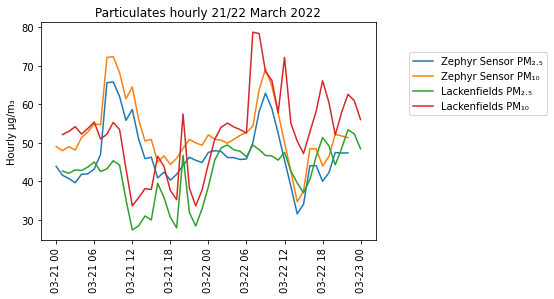

In [76]:
###############################################
# Focus on sahara dust event 21/22 March 2022
###############################################

# Plot hourly Lakenfields and Sensor PM10 and PM2.5

# use df_L for Lakenfields
# use dfAQ21_22March for sensor

# Resample sensor for hourly
dfAQ21_22March_hrly = dfAQ21_22March.resample('H')
dfAQ21_22March_hrly_mean = dfAQ21_22March_hrly.mean()

# Select 21st and 22nd March from Lakenfields data
df_L_21Mar = df_L.loc['2022-03-21']
df_L_22Mar = df_L.loc['2022-03-22']
df_L_2122Mar = pd.concat([df_L_21Mar, df_L_22Mar])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(dfAQ21_22March_hrly_mean['260-PM2.5(ug/m3)'], label='Zephyr Sensor PM\u2082.\u2085')
ax.plot(dfAQ21_22March_hrly_mean['260-PM10(ug/m3)'], label='Zephyr Sensor PM\u2081\u2080')
ax.plot(df_L_2122Mar['PM2.5 particulate matter'], label='Lackenfields PM\u2082.\u2085')
ax.plot(df_L_2122Mar['PM10 particulate matter'], label='Lackenfields PM\u2081\u2080')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=3) # place legend outside plot
ax.set_ylabel('Hourly μg/m\u2083')
ax.set_title('Particulates hourly 21/22 March 2022')


The Zephyr sensor had no readings from 23 to 26 March 2022.  Further investigation would be required to ascertain whether this could be linked to the dust cloud event.

Text(0.5, 1.0, 'Particulates daily 19-25 March 2022')

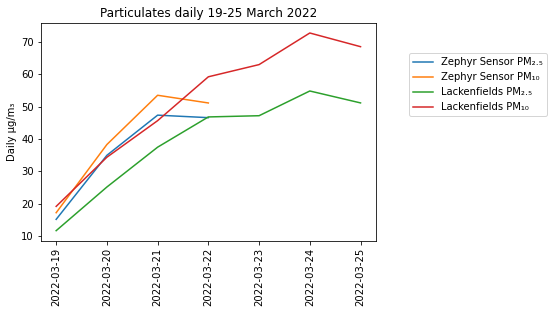

In [77]:
# Plot daily
# use df_L for Lakenfields
# use dfAQMarch2022 for sensor

# Plot daily Lakenfields and Sensor PM10 and PM2.5

# Select week around 21st and 22nd March from sensor data
df_19Mar = dfAQMarch2022.loc['2022-03-19']
df_20Mar = dfAQMarch2022.loc['2022-03-20']
df_21Mar = dfAQMarch2022.loc['2022-03-21']
df_22Mar = dfAQMarch2022.loc['2022-03-22']
df_23Mar = dfAQMarch2022.loc['2022-03-23']
df_24Mar = dfAQMarch2022.loc['2022-03-24']
df_25Mar = dfAQMarch2022.loc['2022-03-25']
df_1925Mar = pd.concat([df_19Mar, df_20Mar, df_21Mar, df_22Mar, df_23Mar, df_24Mar, df_25Mar])

# Rasample sensor for daily
df_daily = df_1925Mar.resample('D')
df_daily_mean = df_daily.mean()

# Select week around 21st and 22nd March from Lakenfields data
df_L_19Mar = df_L.loc['2022-03-19']
df_L_20Mar = df_L.loc['2022-03-20']
df_L_21Mar = df_L.loc['2022-03-21']
df_L_22Mar = df_L.loc['2022-03-22']
df_L_23Mar = df_L.loc['2022-03-23']
df_L_24Mar = df_L.loc['2022-03-24']
df_L_25Mar = df_L.loc['2022-03-25']
df_L_1925Mar = pd.concat([df_L_19Mar, df_L_20Mar, df_L_21Mar, df_L_22Mar, df_L_23Mar, df_L_24Mar, df_L_25Mar])

# Rasample Lakenfields for daily
df_L_daily = df_L_1925Mar.resample('D')
df_L_daily_mean = df_L_daily.mean()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_daily_mean['260-PM2.5(ug/m3)'], label='Zephyr Sensor PM\u2082.\u2085')
ax.plot(df_daily_mean['260-PM10(ug/m3)'], label='Zephyr Sensor PM\u2081\u2080')
ax.plot(df_L_daily_mean['PM2.5 particulate matter'], label='Lackenfields PM\u2082.\u2085')
ax.plot(df_L_daily_mean['PM10 particulate matter'], label='Lackenfields PM\u2081\u2080')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=3) # place legend outside plot
ax.set_ylabel('Daily μg/m\u2083')
ax.set_title('Particulates daily 19-25 March 2022')

Text(0.5, 1.0, 'Particulates weekly March 2022')

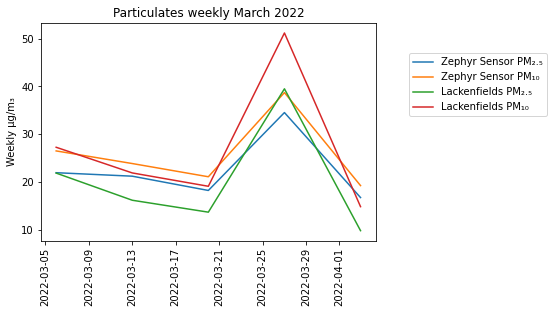

In [78]:

# df_L_weekly = df_L.resample('W')
# df_L_weekly_mean = df_L_weekly.mean()

# df_L_weekly_mean
# use df_L for Lakenfields
# use dfAQMarch2022 for sensor

# Plot weekly Lakenfields and Sensor PM10 and PM2.5

# use dfAQMarch2022 for sensor
# Rasample sensor for daily
df_weekly = dfAQMarch2022.resample('W')
df_weekly_mean = df_weekly.mean()

# Select March from Lakenfields data
df_L_Mar = df_L.loc['2022-03']

# Rasample Lakenfields for weekly
df_L_weekly_Mar = df_L_Mar.resample('W')
df_L_weekly_mean = df_L_weekly_Mar.mean()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_weekly_mean['260-PM2.5(ug/m3)'], label='Zephyr Sensor PM\u2082.\u2085')
ax.plot(df_weekly_mean['260-PM10(ug/m3)'], label='Zephyr Sensor PM\u2081\u2080')
ax.plot(df_L_weekly_mean['PM2.5 particulate matter'], label='Lackenfields PM\u2082.\u2085')
ax.plot(df_L_weekly_mean['PM10 particulate matter'], label='Lackenfields PM\u2081\u2080')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=3) # place legend outside plot
ax.set_ylabel('Weekly μg/m\u2083')
ax.set_title('Particulates weekly March 2022')


Traffic volume data was provided by Suffolk County Council from a sensor close to the Zephyr sensor.

It was provided as annual excel spreadsheets with a tab per week containing hourly readings of south, north and total flow traffic volumes.

Hourly total flow readings from 1 September 2020 - 31 August 2022 were copied into a csv file and used below.


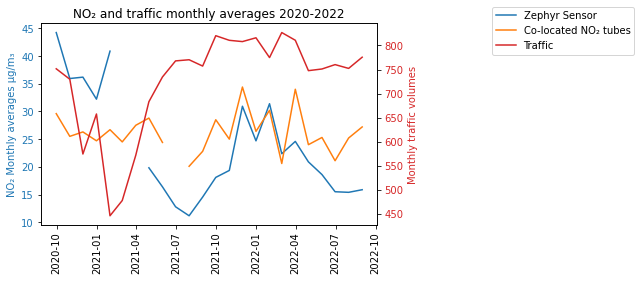

In [79]:
###################################
# Compare traffic and NO2
###################################

# Read in weekly traffic data, parse dates and create new DateTime column, format to day, month, year

df_traffic21_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/Traffic/Week_2021_2022.csv',
                              parse_dates={'DateTime':['Date', 'Time']}, dayfirst=True)

# Set the DateTime column as index
df_traffic21_22.set_index('DateTime', inplace=True)

# Resample traffic to monthly

df_traffic21_22_mnthly = df_traffic21_22.resample('M')
df_traffic21_22_mnthly_mean = df_traffic21_22_mnthly.mean()

# Read in Tayfen Diffusion Tube monthly mean data and combine for 20-22
NO_20_21 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_20_21_monthly_means_comb.csv',
                       index_col=0, parse_dates=True)
Tayfen_20_21 = NO_20_21['TayfenDT adjusted']
NO_21_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_21_22_monthly_means_comb.csv',
                       index_col=0, parse_dates=True)
Tayfen_21_22 = NO_21_22['TayfenDT adjusted']
Tayfen = pd.concat([Tayfen_20_21, Tayfen_21_22])

# Combine Zephyr sensor NO2 data
NO2Sensor = pd.concat([no2_20_21_monthly_mean, no2_21_22_monthly_mean])

# Plot monthly NO2 and traffic on line graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

color='tab:blue'
ax.plot(NO2Sensor, label='Zephyr Sensor')
# ax.plot(df_WF_monthly_mean['Nitrogen dioxide'], label='Wicken Fen')
# ax.plot(df_L_monthly_mean['Nitrogen dioxide'], label='Lackenfields')
# ax.plot(df_SO_monthly_mean['Nitrogen dioxide'], label='St Osyth')
ax.plot(Tayfen, label='Co-located NO\u2082 tubes')
ax.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax.set_ylabel('NO\u2082 Monthly averages μg/m\u2083', color=color)

ax1 = ax.twinx() # plot using same x axis (ie dates)
color='tab:red'
ax1.set_ylabel('Monthly traffic volumes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_traffic21_22_mnthly_mean, label='Traffic', color=color)

ax.set_title("NO\u2082 and traffic monthly averages 2020-2022")
fig.legend(bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside plot
fig.tight_layout()


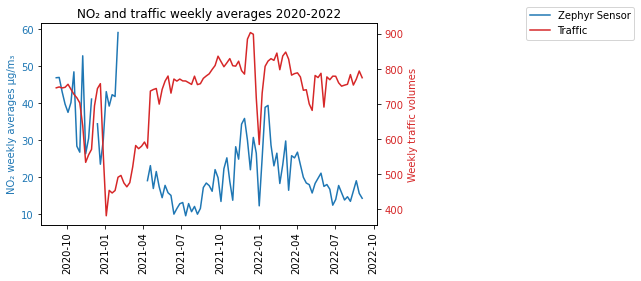

In [80]:
# Plot weekly NO2 and traffic data
# NB Tayfen Diff tube only available as monthly, therefore cannot resample correctly to weekly

# Resample traffic to weekly

df_traffic21_22_wkly = df_traffic21_22.resample('W')
df_traffic21_22_wkly_mean = df_traffic21_22_wkly.mean()


# Resample Zephyr sensor to weekly

NO2SensorFull = pd.concat([no2_20_21, no2_21_22])
NO2Sensor_wkly = NO2SensorFull.resample('W')
NO2Sensor_wkly_mean = NO2Sensor_wkly.mean()

# Plot weekly Sensor NO2 and traffic on line graph

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

color='tab:blue'
ax.plot(NO2Sensor_wkly_mean, label='Zephyr Sensor')
ax.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax.set_ylabel('NO\u2082 weekly averages μg/m\u2083', color=color)

ax1 = ax.twinx() # plot using same x axis (ie dates)
color='tab:red'
ax1.set_ylabel('Weekly traffic volumes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_traffic21_22_wkly_mean, label='Traffic', color=color)

ax.set_title("NO\u2082 and traffic weekly averages 2020-2022")
fig.legend(bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside plot
fig.tight_layout()

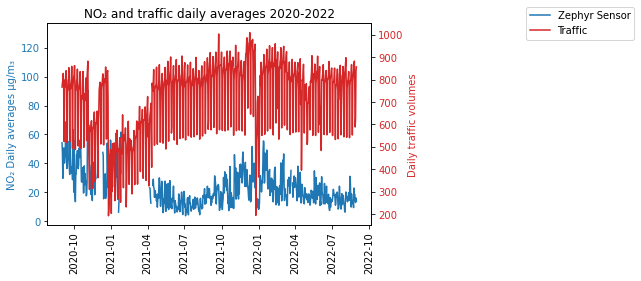

In [81]:
# Plot daily NO2 and traffic data
# NB Tayfen Diff tube only available as monthly, therefore cannot resample correctly to daily

# Resample traffic to daily

df_traffic21_22_dly = df_traffic21_22.resample('D')
df_traffic21_22_dly_mean = df_traffic21_22_dly.mean()


# Resample Zephyr sensor to daily

NO2Sensor_dly = NO2SensorFull.resample('D')
NO2Sensor_dly_mean = NO2Sensor_dly.mean()

# Plot daily Sensor NO2 and traffic on line graph

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

color='tab:blue'
ax.plot(NO2Sensor_dly_mean, label='Zephyr Sensor')
ax.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax.set_ylabel('NO\u2082 Daily averages μg/m\u2083', color=color)

ax1 = ax.twinx() # plot using same x axis (ie dates)
color='tab:red'
ax1.set_ylabel('Daily traffic volumes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_traffic21_22_dly_mean, label='Traffic', color=color)

ax.set_title("NO\u2082 and traffic daily averages 2020-2022")
fig.legend(bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside plot
fig.tight_layout()

From the above visualisations there did not appear to be any correlation between traffic volumes and NO2 levels.  A scattergraph was plotted to confirm this.

Text(0.5, 1.0, 'NO₂ and traffic daily averages 2020-2022')

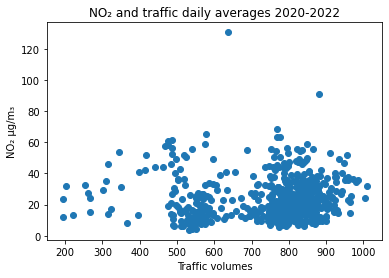

In [82]:
# Plot NO2 and traffic on scattergraph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_traffic21_22_dly_mean, NO2Sensor_dly_mean)
ax.set_ylabel('NO\u2082 μg/m\u2083')
ax.set_xlabel('Traffic volumes')
ax.set_title("NO\u2082 and traffic daily averages 2020-2022")

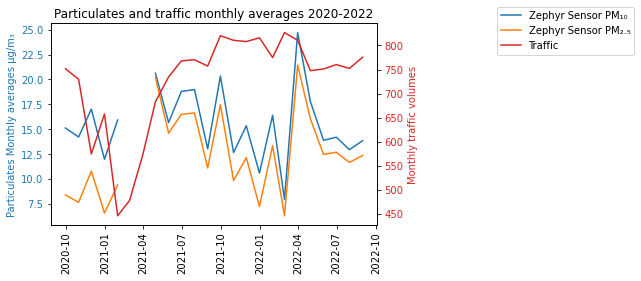

In [83]:
###################################
# Compare traffic and Particulates
###################################

# Monthly

# Combine Zephyr sensor PM10 and PM2.5 data
PM10Sensor_monthly = pd.concat([pm10_20_21_monthly_mean, pm10_21_22_monthly_mean])
PM25Sensor_monthly = pd.concat([pm25_20_21_monthly_mean, pm25_21_22_monthly_mean])

# Plot monthly PM and traffic on line graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

color='tab:blue'
ax.plot(PM10Sensor_monthly, label='Zephyr Sensor PM\u2081\u2080')
ax.plot(PM25Sensor_monthly, label='Zephyr Sensor PM\u2082.\u2085')
ax.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax.set_ylabel('Particulates Monthly averages μg/m\u2083', color=color)

ax1 = ax.twinx() # plot using same x axis (ie dates)
color='tab:red'
ax1.set_ylabel('Monthly traffic volumes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_traffic21_22_mnthly_mean, label='Traffic', color=color)

ax.set_title("Particulates and traffic monthly averages 2020-2022")
fig.legend(bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside plot
fig.tight_layout()


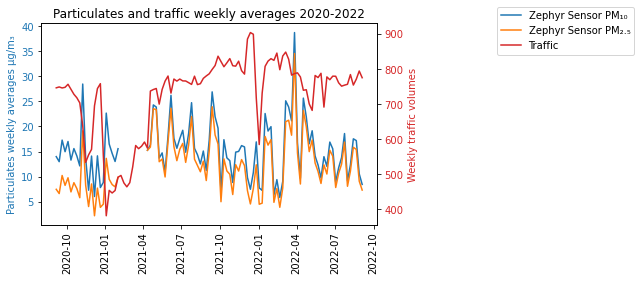

In [84]:
# Plot weekly Particulates and traffic data

# Resample Zephyr sensor PM10 to weekly

pm10SensorFull = pd.concat([pm10_20_21, pm10_21_22])
pm10Sensor_wkly = pm10SensorFull.resample('W')
pm10Sensor_wkly_mean = pm10Sensor_wkly.mean()

# Resample Zephyr sensor PM2.5 to weekly

pm25SensorFull = pd.concat([pm25_20_21, pm25_21_22])
pm25Sensor_wkly = pm25SensorFull.resample('W')
pm25Sensor_wkly_mean = pm25Sensor_wkly.mean()

# Plot weekly Sensor particulates and traffic on line graph

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

color='tab:blue'
ax.plot(pm10Sensor_wkly_mean, label='Zephyr Sensor PM\u2081\u2080')
ax.plot(pm25Sensor_wkly_mean, label='Zephyr Sensor PM\u2082.\u2085')
ax.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax.set_ylabel('Particulates weekly averages μg/m\u2083', color=color)

ax1 = ax.twinx() # plot using same x axis (ie dates)
color='tab:red'
ax1.set_ylabel('Weekly traffic volumes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_traffic21_22_wkly_mean, label='Traffic', color=color)

ax.set_title("Particulates and traffic weekly averages 2020-2022")
fig.legend(bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside plot
fig.tight_layout()

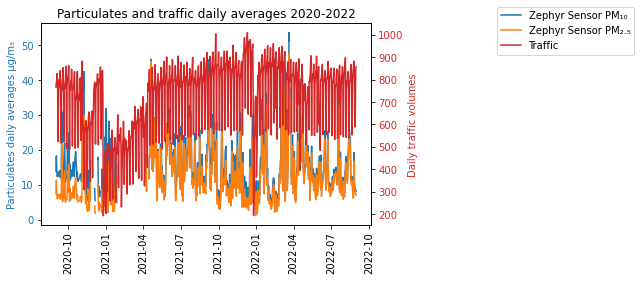

In [85]:
# Plot daily Particulates and traffic data

# Resample Zephyr sensor PM10 to daily

pm10SensorFull = pd.concat([pm10_20_21, pm10_21_22])
pm10Sensor_dly = pm10SensorFull.resample('D')
pm10Sensor_dly_mean = pm10Sensor_dly.mean()

# Resample Zephyr sensor PM2.5 to daily

pm25SensorFull = pd.concat([pm25_20_21, pm25_21_22])
pm25Sensor_dly = pm25SensorFull.resample('D')
pm25Sensor_dly_mean = pm25Sensor_dly.mean()

# Plot daily Sensor particulates and traffic on line graph

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

color='tab:blue'
ax.plot(pm10Sensor_dly_mean, label='Zephyr Sensor PM\u2081\u2080')
ax.plot(pm25Sensor_dly_mean, label='Zephyr Sensor PM\u2082.\u2085')
ax.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax.set_ylabel('Particulates daily averages μg/m\u2083', color=color)

ax1 = ax.twinx() # plot using same x axis (ie dates)
color='tab:red'
ax1.set_ylabel('Daily traffic volumes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(df_traffic21_22_dly_mean, label='Traffic', color=color)

ax.set_title("Particulates and traffic daily averages 2020-2022")
fig.legend(bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside plot
fig.tight_layout()

Text(0.5, 1.0, 'PM₂.₅ and traffic daily averages 2020-2022')

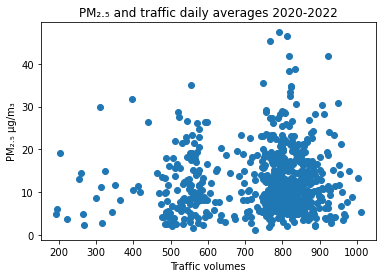

In [86]:
# Plot PM2.5 and traffic on scattergraph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_traffic21_22_dly_mean, pm25Sensor_dly_mean)
ax.set_ylabel('PM\u2082.\u2085 μg/m\u2083')
ax.set_xlabel('Traffic volumes')
ax.set_title("PM\u2082.\u2085 and traffic daily averages 2020-2022")

Text(0.5, 1.0, 'PM₁₀ and traffic daily averages 2020-2022')

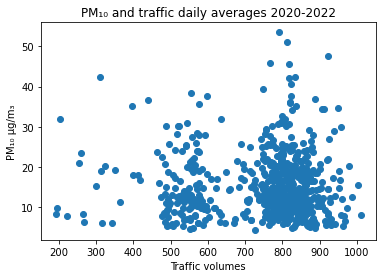

In [87]:
# Plot PM10 and traffic on scattergraph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_traffic21_22_dly_mean, pm10Sensor_dly_mean)
ax.set_ylabel('PM\u2081\u2080 μg/m\u2083')
ax.set_xlabel('Traffic volumes')
ax.set_title("PM\u2081\u2080 and traffic daily averages 2020-2022")

Traffic volumes, Zephyr sensor and DEFRA site readings were brought together to further examine whether any correlation could be seen between traffic, particulates and NO2.

In [88]:
# Create new dataframe of traffic, NO2 and Particulates

# Resample NO2 data to hourly
NO2Sensor_hrly = NO2SensorFull.resample('H')
NO2Sensor_hrly_mean = NO2Sensor_hrly.mean()

# Concat hourly Particulates
df_pm25_hrly = pd.concat([pm25_20_21_hourly_mean, pm25_21_22_hourly_mean])
df_pm10_hrly = pd.concat([pm10_20_21_hourly_mean, pm10_21_22_hourly_mean])

# Concat hourly NO2 and particulates
df_aq_hrly = pd.concat([NO2Sensor_hrly_mean, df_pm25_hrly, df_pm10_hrly], axis = 1)

# Set column headings
df_aq_hrly.columns = ['Zephyr NO\u2082', 'Zephyr PM\u2082.\u2085', 'Zephyr PM\u2081\u2080']

# Read in weekly traffic data, parse dates and create new DateTime column, format to day, month, year
df_traffic21_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/Traffic/Week_2021_2022.csv',
                              parse_dates={'DateTime':['Date', 'Time']}, dayfirst=True)
df_traffic21_22['DateTime'] = pd.to_datetime(df_traffic21_22['DateTime'], utc=True)

# Set the DateTime column as index and set column heading
df_traffic21_22.set_index('DateTime', inplace=True)
df_traffic21_22.columns = ['Traffic Volume']

# Concat air quality and traffic
df_aq_traff = pd.concat([df_traffic21_22['Traffic Volume'], df_aq_hrly], axis=1)
df_aq_traff

,Traffic Volume,Zephyr NO₂,Zephyr PM₂.₅,Zephyr PM₁₀
2020-09-01 00:00:00+00:00,40.0,33.026667,6.976667,13.4200
2020-09-01 01:00:00+00:00,25.0,27.977500,6.962500,13.4775
2020-09-01 02:00:00+00:00,22.0,25.177500,6.927500,13.3900
2020-09-01 03:00:00+00:00,36.0,23.527500,6.890000,13.3250
2020-09-01 04:00:00+00:00,43.0,21.210000,6.920000,13.3900
...,...,...,...,...
2022-08-31 19:00:00+00:00,876.0,25.552500,6.627500,7.2900
2022-08-31 20:00:00+00:00,596.0,22.215000,5.197500,5.7175
2022-08-31 21:00:00+00:00,411.0,20.820000,4.660000,5.1275
2022-08-31 22:00:00+00:00,271.0,17.012500,3.595000,3.9250


In [89]:
# Concat NO2 and Particulates for all DEFRA sites
df_defra = pd.concat([df_L['PM10 particulate matter'], df_L['PM2.5 particulate matter'], df_L['Nitrogen dioxide'],
                     df_WF['PM10 particulate matter'], df_WF['PM2.5 particulate matter'], df_WF['Nitrogen dioxide'],
                     df_SO['PM10 particulate matter'], df_SO['PM2.5 particulate matter'], df_SO['Nitrogen dioxide']],
                     axis=1)

# Set column headings
df_defra.columns = ['Lakenfields PM\u2081\u2080', 'Lakenfields PM\u2082.\u2085', 'Lakenfields NO\u2082',
                    'Wicken Fen PM\u2081\u2080', 'Wicken Fen PM\u2082.\u2085', 'Wicken Fen NO\u2082',
                   'St Osyth PM\u2081\u2080', 'St Osyth PM\u2082.\u2085', 'St Osyth NO\u2082']

df_defra

,Lakenfields PM₁₀,Lakenfields PM₂.₅,Lakenfields NO₂,Wicken Fen PM₁₀,Wicken Fen PM₂.₅,Wicken Fen NO₂,St Osyth PM₁₀,St Osyth PM₂.₅,St Osyth NO₂
DateTime,,,,,,,,,
2020-09-01 01:00:00+00:00,12.775,NaN,25.84477,NaN,NaN,6.07776,NaN,NaN,9.52892
2020-09-01 02:00:00+00:00,14.900,NaN,22.64361,NaN,NaN,5.01868,NaN,NaN,NaN
2020-09-01 03:00:00+00:00,19.825,NaN,17.79461,NaN,NaN,3.89288,NaN,NaN,7.92760
2020-09-01 04:00:00+00:00,15.100,NaN,15.88712,NaN,NaN,3.69049,NaN,NaN,8.94870
2020-09-01 05:00:00+00:00,11.525,NaN,14.16749,NaN,NaN,3.12573,NaN,NaN,9.12882
...,...,...,...,...,...,...,...,...,...
2022-08-31 20:00:00+00:00,8.075,3.396,3.65668,11.575,3.467,3.22484,8.775,4.127,NaN
2022-08-31 21:00:00+00:00,7.550,3.349,5.70100,10.675,3.986,2.89366,9.175,4.269,NaN
2022-08-31 22:00:00+00:00,8.625,3.561,7.47398,9.075,3.349,3.60014,9.450,4.410,NaN


In [90]:
# Concat Traffic/AQ with DEFRA sites

df_aq_traff_defra = pd.concat([df_aq_traff, df_defra], axis=1)
df_aq_traff_defra

,Traffic Volume,Zephyr NO₂,Zephyr PM₂.₅,Zephyr PM₁₀,Lakenfields PM₁₀,Lakenfields PM₂.₅,Lakenfields NO₂,Wicken Fen PM₁₀,Wicken Fen PM₂.₅,Wicken Fen NO₂,St Osyth PM₁₀,St Osyth PM₂.₅,St Osyth NO₂
2020-09-01 00:00:00+00:00,40.0,33.026667,6.976667,13.4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01 01:00:00+00:00,25.0,27.977500,6.962500,13.4775,12.775,NaN,25.84477,NaN,NaN,6.07776,NaN,NaN,9.52892
2020-09-01 02:00:00+00:00,22.0,25.177500,6.927500,13.3900,14.900,NaN,22.64361,NaN,NaN,5.01868,NaN,NaN,NaN
2020-09-01 03:00:00+00:00,36.0,23.527500,6.890000,13.3250,19.825,NaN,17.79461,NaN,NaN,3.89288,NaN,NaN,7.92760
2020-09-01 04:00:00+00:00,43.0,21.210000,6.920000,13.3900,15.100,NaN,15.88712,NaN,NaN,3.69049,NaN,NaN,8.94870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 20:00:00+00:00,596.0,22.215000,5.197500,5.7175,8.075,3.396,3.65668,11.575,3.467,3.22484,8.775,4.127,NaN
2022-08-31 21:00:00+00:00,411.0,20.820000,4.660000,5.1275,7.550,3.349,5.70100,10.675,3.986,2.89366,9.175,4.269,NaN
2022-08-31 22:00:00+00:00,271.0,17.012500,3.595000,3.9250,8.625,3.561,7.47398,9.075,3.349,3.60014,9.450,4.410,NaN
2022-08-31 23:00:00+00:00,136.0,NaN,NaN,NaN,9.100,3.750,8.65616,8.275,3.137,4.22106,10.025,4.575,NaN


In [91]:
# Summary of Traffic/AQ/DEFRA data
df_aq_traff_defra.describe()

,Traffic Volume,Zephyr NO₂,Zephyr PM₂.₅,Zephyr PM₁₀,Lakenfields PM₁₀,Lakenfields PM₂.₅,Lakenfields NO₂,Wicken Fen PM₁₀,Wicken Fen PM₂.₅,Wicken Fen NO₂,St Osyth PM₁₀,St Osyth PM₂.₅,St Osyth NO₂
count,17502.000000,15065.000000,15096.000000,15096.000000,17269.000000,14341.000000,16413.000000,2021.000000,2021.000000,16911.000000,3681.000000,3681.000000,16258.000000
mean,724.483716,23.210504,12.456983,15.429975,13.434593,8.935172,9.985407,11.783964,5.016974,6.255699,13.106794,6.976374,8.172960
std,583.361190,18.288292,8.939575,9.563695,11.371517,8.078354,7.897943,6.548122,3.156858,5.852183,9.535011,4.987877,7.799656
min,0.000000,0.000000,0.000000,2.535000,0.700000,0.401000,0.713310,1.775000,0.991000,0.045740,1.500000,0.825000,0.256130
25%,122.000000,10.950000,5.820000,8.692500,7.500000,4.151000,4.934680,7.500000,3.184000,2.539050,7.350000,3.632000,3.377885
50%,604.000000,18.550000,10.480000,12.900000,10.750000,6.321000,7.498740,10.150000,4.316000,4.487510,10.650000,5.542000,5.701330
75%,1296.000000,30.162500,16.887500,19.645625,16.050000,10.566000,12.209790,13.825000,5.896000,7.806645,15.575000,8.514000,9.840160
max,1901.000000,169.515000,65.807500,72.392500,605.275000,111.180000,73.175760,54.150000,35.684000,59.204340,181.575000,44.481000,72.821580


In [92]:
# Show a correlation matrix on Traffic Volumes

corr_matrix = df_aq_traff_defra.corr()
corr_matrix['Traffic Volume'].sort_values(ascending=False)

Traffic Volume       1.000000
Zephyr NO₂           0.239653
Zephyr PM₂.₅         0.163081
Wicken Fen PM₁₀      0.153585
St Osyth PM₁₀        0.139170
Zephyr PM₁₀          0.098630
Lakenfields NO₂      0.001297
Wicken Fen PM₂.₅    -0.020154
Lakenfields PM₁₀    -0.039628
St Osyth PM₂.₅      -0.049163
St Osyth NO₂        -0.068410
Wicken Fen NO₂      -0.105730
Lakenfields PM₂.₅   -0.106260
Name: Traffic Volume, dtype: float64

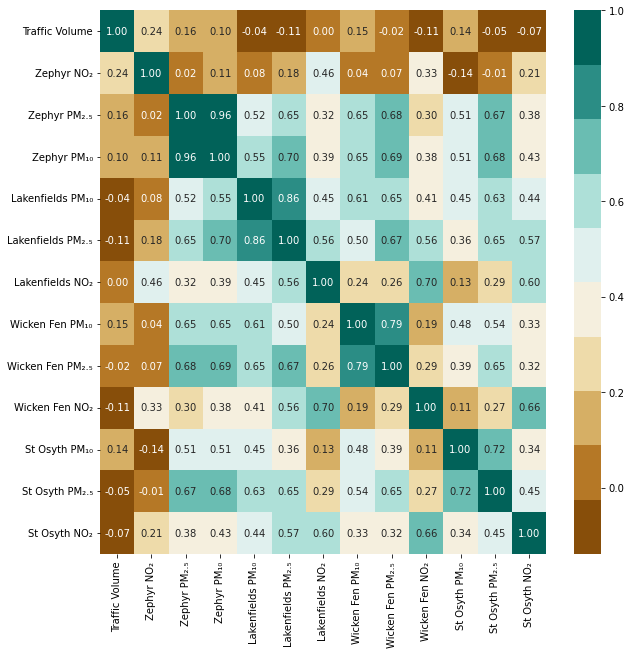

In [93]:
# Show a correlation matrix heat map

fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette('BrBG', 10)

sns.heatmap(corr_matrix,
           cmap=colormap,
           annot=True, # show annotations in boxesb
           fmt='.2f') # display to 2 dec places

plt.show()

As expected from the earlier analysis and visualisations, strong correlation can be seen between PM10 and PM2.5 readings, particularly from the same sensor.  However there appears to be no correlation between traffic and particulates or traffic and NO2.

In [94]:
# Summarise NO2 hourly means to check for any exceedances over 200 as per objectives
NO2Sensor_hrly_mean.describe().round(decimals=2)

count    15065.00
mean        23.21
std         18.29
min          0.00
25%         10.95
50%         18.55
75%         30.16
max        169.52
dtype: float64

No exceedances over 200ug/m3

## Road Closures

There were 2 road closures adjacent to the Zephyr sensor location during the analysis period:
- 6 January 2022 9.36am - 11.30pm
- 25 April 1022 1.30pm - 6 May 2022 11.59pm

Particulates and NO2 readings from the Zephyr sensor are analysed below to assess whether particulates and NO2 reduced during the road closures.

In [95]:
# Create a dataframe of 2021/22 PM2.5, PM10 and NO2 15-min readings

df_rd_close = pd.concat([pm25_21_22, pm10_21_22, no2_21_22], axis=1)
df_rd_close.columns = ['PM\u2082.\u2085','PM\u2081\u2080','NO\u2082']
df_rd_close

,PM₂.₅,PM₁₀,NO₂
Timestamp(UTC),,,
2021-09-01 00:00:00+00:00,3.87,6.88,7.42
2021-09-01 00:15:00+00:00,3.63,6.52,9.06
2021-09-01 00:30:00+00:00,3.70,6.86,10.14
2021-09-01 00:45:00+00:00,3.96,7.04,8.32
2021-09-01 01:00:00+00:00,3.59,6.72,5.41
...,...,...,...
2022-08-31 21:45:00+00:00,4.29,4.72,18.81
2022-08-31 22:00:00+00:00,3.91,4.30,16.52
2022-08-31 22:15:00+00:00,3.58,3.94,17.30


In [96]:
# Select days around 6 Jan 2022 for first road closure
df_rd_close_4 = df_rd_close.loc['2022-01-04']
df_rd_close_5 = df_rd_close.loc['2022-01-05']
df_rd_close_6 = df_rd_close.loc['2022-01-06']
df_rd_close_7 = df_rd_close.loc['2022-01-07']
df_rd_close_8 = df_rd_close.loc['2022-01-08']

df_rd_close_Jan = pd.concat([df_rd_close_4, df_rd_close_5, df_rd_close_6, df_rd_close_7, df_rd_close_8])
df_rd_close_Jan


,PM₂.₅,PM₁₀,NO₂
Timestamp(UTC),,,
2022-01-04 00:00:00+00:00,1.72,4.89,11.16
2022-01-04 00:15:00+00:00,1.59,4.97,10.16
2022-01-04 00:30:00+00:00,1.23,4.72,9.86
2022-01-04 00:45:00+00:00,1.20,4.91,9.38
2022-01-04 01:00:00+00:00,1.52,5.27,8.97
...,...,...,...
2022-01-08 22:45:00+00:00,4.50,7.27,19.46
2022-01-08 23:00:00+00:00,4.45,7.16,16.23
2022-01-08 23:15:00+00:00,3.57,6.57,20.49


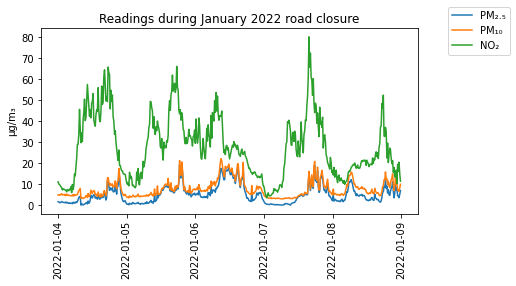

In [97]:
# Plot days around 6 January 2022 on line graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_rd_close_Jan['PM\u2082.\u2085'], label='PM\u2082.\u2085')
ax.plot(df_rd_close_Jan['PM\u2081\u2080'], label='PM\u2081\u2080')
ax.plot(df_rd_close_Jan['NO\u2082'], label='NO\u2082')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("Readings during January 2022 road closure")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()

Text(0.5, 1.0, 'NO₂ around 6 January road closure')

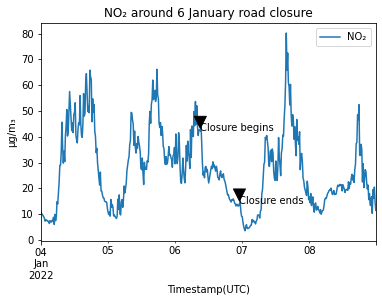

In [98]:
# Plot NO2 data during January Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# data = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/NO2Data/no2_20_21_monthly_means_comb.csv', index_col=0, parse_dates=True)
no2 = df_rd_close_Jan['NO\u2082']

no2.plot(ax=ax)

ldowns = [
    (datetime(2022, 1, 6, 9, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 1, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, no2.asof(date) + 1),
    xytext=(date, no2.asof(date) + 3),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='top')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('NO\u2082 around 6 January road closure')

Text(0.5, 1.0, 'NO₂ on 6 January 2022')

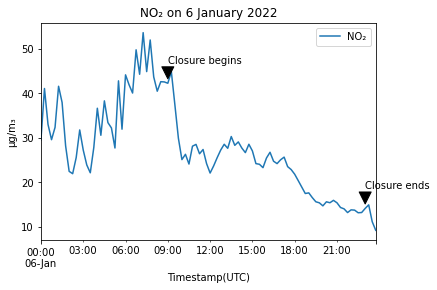

In [99]:
# Plot NO2 data during 6 January Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

no2_6 = df_rd_close_6['NO\u2082']

no2_6.plot(ax=ax)

ldowns = [
    (datetime(2022, 1, 6, 9, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 1, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, no2_6.asof(date) + 1),
    xytext=(date, no2_6.asof(date) + 4),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='bottom')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('NO\u2082 on 6 January 2022')

(0.0, 25.0)

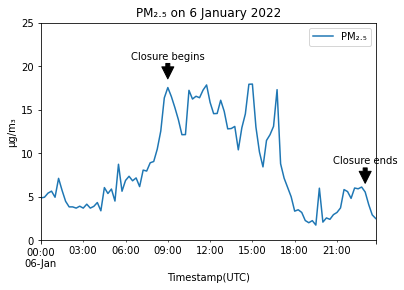

In [100]:
# Plot PM2.5 data during 6 January Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

pm25_6 = df_rd_close_6['PM\u2082.\u2085']

pm25_6.plot(ax=ax)

ldowns = [
    (datetime(2022, 1, 6, 9, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 1, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, pm25_6.asof(date) + 1),
    xytext=(date, pm25_6.asof(date) + 3),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='center', verticalalignment='bottom')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('PM\u2082.\u2085 on 6 January 2022')
plt.ylim(0, 25) 

(0.0, 30.0)

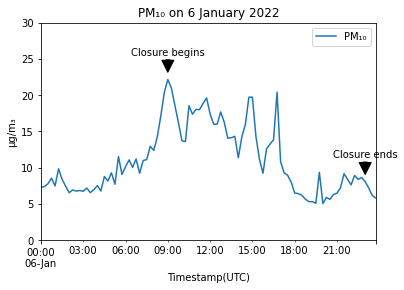

In [101]:
# Plot PM10 data during 6 January Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

pm10_6 = df_rd_close_6['PM\u2081\u2080']

pm10_6.plot(ax=ax)

ldowns = [
    (datetime(2022, 1, 6, 9, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 1, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, pm10_6.asof(date) + 1),
    xytext=(date, pm10_6.asof(date) + 3),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='center', verticalalignment='bottom')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('PM\u2081\u2080 on 6 January 2022')
plt.ylim(0, 30) 

In [102]:
# Resample to hourly for second road closure
df_rd_close_hourly = df_rd_close.resample('H')
df_rd_close_hourly_mean = df_rd_close_hourly.mean()

# Select April and May for second road closure
df_rd_close_apr_hrly = df_rd_close_hourly_mean.loc['April 2022']
df_rd_close_may_hrly = df_rd_close_hourly_mean.loc['May 2022']

df_rd_close_2nd_hrly = pd.concat([df_rd_close_apr_hrly, df_rd_close_may_hrly])

# Resample to daily for second road closure
df_rd_close_daily = df_rd_close.resample('D')
df_rd_close_daily_mean = df_rd_close_daily.mean()

# Select April and May for second road closure
df_rd_close_apr_dly = df_rd_close_daily_mean.loc['April 2022']
df_rd_close_may_dly = df_rd_close_daily_mean.loc['May 2022']

df_rd_close_2nd_dly = pd.concat([df_rd_close_apr_dly, df_rd_close_may_dly])

df_rd_close_2nd_dly

,PM₂.₅,PM₁₀,NO₂
Timestamp(UTC),,,
2022-04-01 00:00:00+00:00,7.730313,8.675313,27.710417
2022-04-02 00:00:00+00:00,10.764896,12.256875,29.997917
2022-04-03 00:00:00+00:00,17.698438,19.457396,26.650625
2022-04-04 00:00:00+00:00,7.181042,8.764896,23.589896
2022-04-05 00:00:00+00:00,5.507500,6.842500,20.597917
...,...,...,...
2022-05-27 00:00:00+00:00,12.925833,14.736354,21.129479
2022-05-28 00:00:00+00:00,10.000208,10.999688,24.849167
2022-05-29 00:00:00+00:00,6.957604,7.681354,19.868125


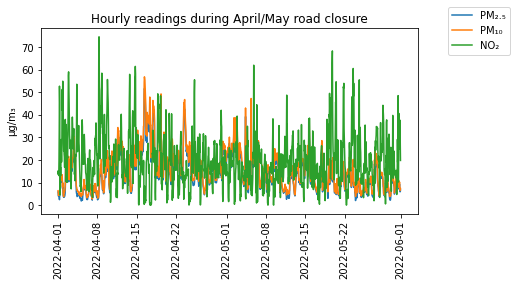

In [103]:
# Plot 2nd closure on line graph (hourly)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_rd_close_2nd_hrly['PM\u2082.\u2085'], label='PM\u2082.\u2085')
ax.plot(df_rd_close_2nd_hrly['PM\u2081\u2080'], label='PM\u2081\u2080')
ax.plot(df_rd_close_2nd_hrly['NO\u2082'], label='NO\u2082')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("Hourly readings during April/May road closure")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()

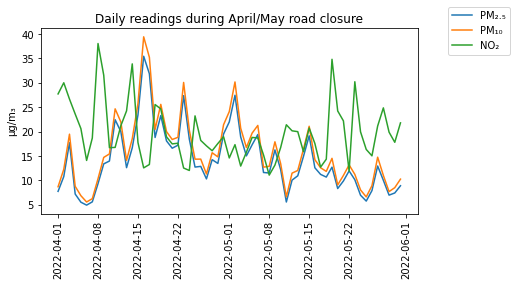

In [104]:
# Plot 2nd closure on line graph (daily)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_rd_close_2nd_dly['PM\u2082.\u2085'], label='PM\u2082.\u2085')
ax.plot(df_rd_close_2nd_dly['PM\u2081\u2080'], label='PM\u2081\u2080')
ax.plot(df_rd_close_2nd_dly['NO\u2082'], label='NO\u2082')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("Daily readings during April/May road closure")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()

Text(0.5, 1.0, 'Hourly NO₂ during April and May 2022')

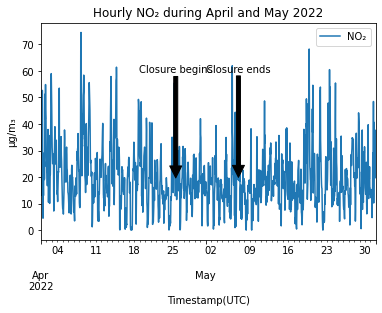

In [105]:
# Plot Hourly NO2 data during Apr/May Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

no2_apr_hrly = df_rd_close_2nd_hrly['NO\u2082']

no2_apr_hrly.plot(ax=ax)

ldowns = [
    (datetime(2022, 4, 25, 13, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 5, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, no2_apr_hrly.asof(date) + 1),
    xytext=(date, no2_apr_hrly.asof(date) + 40),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='center', verticalalignment='bottom')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('Hourly NO\u2082 during April and May 2022')

Text(0.5, 1.0, 'Daily NO₂ during April and May 2022')

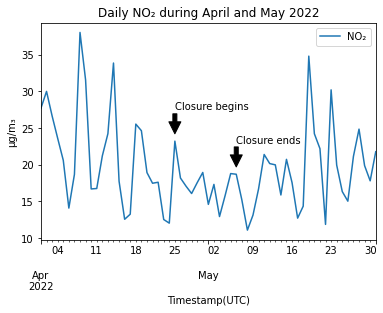

In [106]:
# Plot Daily NO2 data during Apr/May Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

no2_apr = df_rd_close_2nd_dly['NO\u2082']

no2_apr.plot(ax=ax)

ldowns = [
    (datetime(2022, 4, 25, 13, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 5, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, no2_apr.asof(date) + 1),
    xytext=(date, no2_apr.asof(date) + 4),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='bottom')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('Daily NO\u2082 during April and May 2022')

Text(0.5, 1.0, 'Daily PM₂.₅ during April and May 2022')

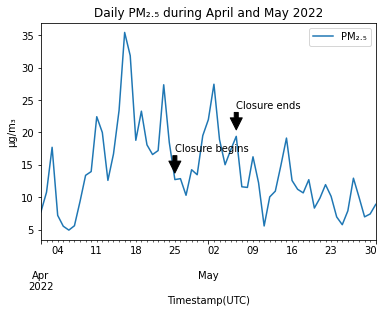

In [107]:
# Plot Daily PM2.5 data during Apr/May Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

pm25_apr = df_rd_close_2nd_dly['PM\u2082.\u2085']

pm25_apr.plot(ax=ax)

ldowns = [
    (datetime(2022, 4, 25, 13, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 5, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, pm25_apr.asof(date) + 1),
    xytext=(date, pm25_apr.asof(date) + 4),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='bottom')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('Daily PM\u2082.\u2085 during April and May 2022')

Text(0.5, 1.0, 'Daily PM₁₀ during April and May 2022')

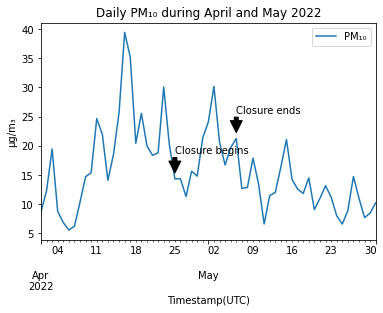

In [108]:
# Plot Daily PM10 data during Apr/May Closure Period

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

pm10_apr = df_rd_close_2nd_dly['PM\u2081\u2080']

pm10_apr.plot(ax=ax)

ldowns = [
    (datetime(2022, 4, 25, 13, tzinfo=timezone(offset=timedelta())), 'Closure begins'),
    (datetime(2022, 5, 6, 23, tzinfo=timezone(offset=timedelta())), 'Closure ends')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, pm10_apr.asof(date) + 1),
    xytext=(date, pm10_apr.asof(date) + 4),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='bottom')

ax.legend(loc='best')
ax.set_ylabel("μg/m\u2083")
ax.set_title('Daily PM\u2081\u2080 during April and May 2022')

Many of the techniques used above were obtained from Python for Data Analysis, Wes McKinney (2013), Sebastopol: O'Reilly Media Inc.

## Save PM2.5 and PM10 September hourly means to csv

Scatterplots and R-squared calculations were showing unexpected results.  Therefore exporting to csv for further analysis in Excel.

In [109]:
pm10_21_22_hourly_mean['2021-09'].to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm10_21_22_hourly_mean_sept.csv', header=True)

In [110]:
pm10_20_21_hourly_mean['2020-09'].to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm10_20_21_hourly_mean_sept.csv', header=True)

In [111]:
pm25_21_22_hourly_mean['2021-09'].to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm25_21_22_hourly_mean_sept.csv', header=True)

In [112]:
pm25_20_21_hourly_mean['2020-09'].to_csv(r'/Users/lisaleggett/Documents/Uni/Python/NZIP/Outputs/pm25_20_21_hourly_mean_sept.csv', header=True)

## Bonfire Night investigation

Analysis was undertaken to ascertain whether bonfires around bonfire night increased particulates.

In 2020, bonfire night fell on Thursday 5th November, so the period Friday 23 October to Sunday 15 November was examined to include the weekends when people were most likely to hold bonfire celebrations along with the weekends before and afterwards.

In 2021, bonfire night fell on Friday 5th November, so the period Friday 22 October to Sunday 14 November was examined.

In [113]:
# Create dataframes for period 2 weekends before and 2 weekends after bonfire night

bfn_20 = dfAQ.loc['2020-10-23':'2020-11-15']
bfn_21 = dfAQ.loc['2020-10-22':'2020-11-14']

KeyError: '2020-10-23'

In [ ]:
bfn_20.describe().round(decimals=2)

In [ ]:
bfn_21.describe().round(decimals=2)

In [ ]:
# Plot 15-min Bonfire Night 20 particulates

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(bfn_20['260-PM1(ug/m3)'], label='PM\u2081')
ax.plot(bfn_20['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(bfn_20['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("15-min particulate readings over Bonfire Night 2020")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()

In [ ]:
# Plot 15-min Bonfire Night 21 particulates

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(bfn_21['260-PM1(ug/m3)'], label='PM\u2081')
ax.plot(bfn_21['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(bfn_21['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("15-min particulate readings over Bonfire Night 2021")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()

In [ ]:
# Resample for hourly figures 2020

bfn_20_hourly = bfn_20.resample('H')
bfn_20_hrly_mean = bfn_20_hourly.mean()

# Plot hourly Bonfire Night 20 particulates

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(bfn_20_hrly_mean['260-PM1(ug/m3)'], label='PM\u2081')
ax.plot(bfn_20_hrly_mean['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(bfn_20_hrly_mean['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("Hourly particulate readings over Bonfire Night 2020")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()



In [ ]:
# Resample for hourly figures 2021

bfn_21_hourly = bfn_21.resample('H')
bfn_21_hrly_mean = bfn_21_hourly.mean()

# Plot hourly Bonfire Night 21 particulates

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(bfn_21_hrly_mean['260-PM1(ug/m3)'], label='PM\u2081')
ax.plot(bfn_21_hrly_mean['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(bfn_21_hrly_mean['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("Hourly particulate readings over Bonfire Night 2021")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()

In [ ]:
# Resample for daily figures 2020

bfn_20_daily = bfn_20.resample('D')
bfn_20_dly_mean = bfn_20_daily.mean()

# Plot daily Bonfire Night 20 particulates

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(bfn_20_dly_mean['260-PM1(ug/m3)'], label='PM\u2081')
ax.plot(bfn_20_dly_mean['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(bfn_20_dly_mean['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("Daily particulate readings over Bonfire Night 2020")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()


In [ ]:
# Resample for daily figures 2021

bfn_21_daily = bfn_21.resample('D')
bfn_21_dly_mean = bfn_21_daily.mean()

# Plot daily Bonfire Night 21 particulates

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(bfn_21_dly_mean['260-PM1(ug/m3)'], label='PM\u2081')
ax.plot(bfn_21_dly_mean['260-PM2.5(ug/m3)'], label='PM\u2082.\u2085')
ax.plot(bfn_21_dly_mean['260-PM10(ug/m3)'], label='PM\u2081\u2080')
ax.set_ylabel('μg/m\u2083')
plt.xticks(rotation=90)
ax.set_title("Daily particulate readings over Bonfire Night 2021")
fig.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0.5) # place legend outside plot
fig.tight_layout()

DEFRA UK Air Quality Objective states: PM10 - 50ug/m3 not to be exceeded more than 35 times a year (24-hour mean)

In [ ]:
print(bfn_20_dly_mean['260-PM10(ug/m3)'].round(decimals=2))

In [ ]:
print(bfn_21_dly_mean['260-PM10(ug/m3)'].round(decimals=2))